# Análise de Índices Macroeconômicos para Sugestionamento de Pilar de Investimento

## Instalação/Referência de bibliotecas utilizadas

In [1]:
!pip install pandas
!pip install seaborn --upgrade
!pip install sklearn --upgrade
!pip install scikit-learn --upgrade
!pip install plotly --upgrade

In [159]:
#Bibliotecas padrão
import numpy as np
import pandas as pd

#Bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Preparação dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Bibliotecas de Algoritmos
from sklearn.tree import DecisionTreeClassifier #Árvore de decisão
from sklearn.ensemble import RandomForestClassifier #Random Forest 
from sklearn.neighbors import KNeighborsClassifier #kNN

#Avaliação de algoritmo
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Configurando as biblioteca
##Seaborn
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,5)})
##Pandas - Mostrar todas as colunas do Dataframe
pd.set_option("display.max_columns", None)

## Importação e tratativa inicial dos dados

### Taxas

#### Taxa Selic

In [3]:
selic = pd.read_csv('dados/Selic.csv',sep=';')

In [4]:
selic.dtypes

Data     object
Valor    object
dtype: object

In [5]:
selic.head(1)

Data Valor
0  01/01/2010  8,75

In [6]:
#Padronizando a nomenclatura das colunas
selic.rename(columns={'Data' : 'DATA_PREGAO', 'Valor' : 'SELIC'}, inplace = True)

#Padronizando a coluna DATA_PREGAO
selic['DATA_PREGAO'] = pd.to_datetime(selic['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
selic['SELIC'] = selic['SELIC'].apply(lambda x: x.replace(',', '.'))
selic['SELIC'] = pd.to_numeric(selic['SELIC'], downcast='float')

#Criando índice
selic.set_index('DATA_PREGAO', inplace=True)

In [161]:
selic.dtypes, type(selic.index)

(SELIC    float32
 dtype: object,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [8]:
selic.head(1)

SELIC
DATA_PREGAO       
2010-01-01    8.75

#### Taxa Câmbio: Dólar

In [9]:
dolar = pd.read_csv('dados/Dolar.csv', sep=';',dtype='str')

In [10]:
dolar.dtypes

DATA       object
COLUNA1    object
COLUNA2    object
TIPO       object
COMPRA     object
VENDA      object
COLUNA3    object
COLUNA4    object
COLUNA5    object
dtype: object

In [11]:
dolar.head(1)

DATA COLUNA1 COLUNA2 TIPO  COMPRA   VENDA COLUNA3 COLUNA4 COLUNA5
0  04012010     220       A  USD  1,7232  1,7240  1,0000  1,0000     NaN

In [12]:
#Padronizando a nomenclatura das colunas
dolar.rename(columns={'DATA' : 'DATA_PREGAO', 'COMPRA' : 'DOLAR'}, inplace = True)

#Removendo colunas desnecessárias
dolar.drop(['COLUNA1', 'COLUNA2', 'TIPO', 'VENDA', 'COLUNA3', 'COLUNA4', 'COLUNA5'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
dolar['DATA_PREGAO'] = dolar['DATA_PREGAO'].apply(lambda x: x[0:2] + '/' + x[2:4] + '/' + x[4:])
dolar['DATA_PREGAO'] = pd.to_datetime(dolar['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
dolar['DOLAR'] = dolar['DOLAR'].apply(lambda x: x.replace(',', '.'))
dolar['DOLAR'] = pd.to_numeric(dolar['DOLAR'], downcast='float')

#Criando índice
dolar.set_index('DATA_PREGAO', inplace=True)

In [162]:
dolar.dtypes, type(dolar.index)

(DOLAR    float32
 dtype: object,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [14]:
dolar.head(1)

DOLAR
DATA_PREGAO        
2010-01-04   1.7232

### Commodities

#### Minério de Ferro Refinado

In [15]:
ferro = pd.read_csv('dados/Minerio_Ferro.csv', sep=',')

In [16]:
ferro.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [17]:
ferro.head(1)

Data  Último Abertura  Máxima  Mínima Vol.   Var%
0  31.12.2020  155,84   155,84  155,84  155,84    -  0,09%

In [18]:
#Padronizando a nomenclatura das colunas
ferro.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'FERRO'}, inplace = True)

#Removendo colunas desnecessárias
ferro.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
ferro['DATA_PREGAO'] = ferro['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
ferro['DATA_PREGAO'] = pd.to_datetime(ferro['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
ferro['FERRO'] = ferro['FERRO'].apply(lambda x: x.replace(',', '.'))
ferro['FERRO'] = pd.to_numeric(ferro['FERRO'], downcast='float')

#Criando índice
ferro.set_index('DATA_PREGAO', inplace=True)

In [19]:
ferro.dtypes

FERRO    float32
dtype: object

In [20]:
ferro.head(1)

FERRO
DATA_PREGAO            
2020-12-31   155.839996

#### Petróleo Brent Futuros

In [21]:
petroleo = pd.read_csv('dados/Petroleo_Brent.csv', sep=',')

In [22]:
petroleo.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [23]:
petroleo.head(1)

Data Último Abertura Máxima Mínima     Vol.   Var%
0  31.12.2020  51,80    51,49  51,84  50,90  133,22K  0,90%

In [24]:
#Padronizando a nomenclatura das colunas
petroleo.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'PETROLEO'}, inplace = True)

#Removendo colunas desnecessárias
petroleo.drop(['Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
petroleo['DATA_PREGAO'] = petroleo['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
petroleo['DATA_PREGAO'] = pd.to_datetime(petroleo['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
petroleo['PETROLEO'] = petroleo['PETROLEO'].apply(lambda x: x.replace(',', '.'))
petroleo['PETROLEO'] = pd.to_numeric(petroleo['PETROLEO'], downcast='float')

#Criando índice
petroleo.set_index('DATA_PREGAO', inplace=True)

In [25]:
petroleo.dtypes

PETROLEO    float32
dtype: object

In [26]:
petroleo.head(1)

PETROLEO
DATA_PREGAO           
2020-12-31   51.799999

#### Ouro

In [27]:
ouro = pd.read_csv('dados/Ouro.csv', sep=',')

In [28]:
ouro.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [29]:
ouro.head(1)

Data    Último  Abertura    Máxima    Mínima   Vol.   Var%
0  31.12.2020  1.905,80  1.910,00  1.915,20  1.902,90  0,73K  0,09%

In [30]:
#Padronizando a nomenclatura das colunas
ouro.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'OURO'}, inplace = True)

#Removendo colunas desnecessárias
ouro.drop(['Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
ouro['DATA_PREGAO'] = ouro['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
ouro['DATA_PREGAO'] = pd.to_datetime(ouro['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
ouro['OURO'] = ouro['OURO'].apply(lambda x: x.replace('.', '').replace(',', '.'))
ouro['OURO'] = pd.to_numeric(ouro['OURO'], downcast='float')

#Criando índice
ouro.set_index('DATA_PREGAO', inplace=True)

In [31]:
ouro.dtypes

OURO    float32
dtype: object

In [32]:
ouro.head(1)

OURO
DATA_PREGAO             
2020-12-31   1905.800049

### Índices

#### Índice Bovespa

In [33]:
bovespa = pd.read_csv('dados/Indice_Bovespa.csv')

In [34]:
bovespa.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [35]:
bovespa.head(1)

Date     Open     High      Low    Close  Adj Close     Volume
0  2010-01-04  68587.0  70081.0  68587.0  70045.0    70045.0  1655400.0

In [36]:
#Padronizando a nomenclatura das colunas
bovespa.rename(columns={'Date' : 'DATA_PREGAO', 'Close' : 'BOVESPA'}, inplace = True)

#Removendo colunas desnecessárias
bovespa.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
bovespa['DATA_PREGAO'] = pd.to_datetime(bovespa['DATA_PREGAO'])

#Padronizando a coluna de VALOR
bovespa['BOVESPA'] = bovespa['BOVESPA'].apply(lambda x: float(x))  

#Criando índice
bovespa.set_index('DATA_PREGAO', inplace=True)

In [37]:
bovespa.dtypes

BOVESPA    float64
dtype: object

In [38]:
bovespa.head(1)

BOVESPA
DATA_PREGAO         
2010-01-04   70045.0

#### Índice S&P 500

In [39]:
sp500 = pd.read_csv('dados/Indice_S&P500.csv')

In [40]:
sp500.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [41]:
sp500.head(1)

Data    Último  Abertura    Máxima    Mínima Vol.   Var%
0  31.12.2020  3.756,07  3.733,27  3.760,20  3.726,88    -  0,64%

In [42]:
#Padronizando a nomenclatura das colunas
sp500.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'SP500'}, inplace = True)

#Removendo colunas desnecessárias
sp500.drop(['Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
sp500['DATA_PREGAO'] = sp500['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
sp500['DATA_PREGAO'] = pd.to_datetime(sp500['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de VALOR
sp500['SP500'] = sp500['SP500'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))  

#Criando índice
sp500.set_index('DATA_PREGAO', inplace=True)

In [43]:
sp500.dtypes

SP500    float64
dtype: object

In [44]:
sp500.head(1)

SP500
DATA_PREGAO         
2020-12-31   3756.07

### Ações

#### VALE3 - VALE

In [45]:
vale = pd.read_csv('dados/vale3.csv')

In [46]:
vale.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [47]:
vale.head(1)

Data Último Abertura Máxima Mínima    Vol.   Var%
0  30.12.2020  87,45    87,19  87,59  86,65  30,10M  0,44%

In [48]:
#Padronizando a nomenclatura das colunas
vale.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'VALE'}, inplace = True)

#Removendo colunas desnecessárias
vale.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
vale['DATA_PREGAO'] = vale['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
vale['DATA_PREGAO'] = pd.to_datetime(vale['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
vale['VALE'] = vale['VALE'].apply(lambda x: x.replace(',', '.'))
vale['VALE'] = pd.to_numeric(vale['VALE'], downcast='float')

#Criando índice
vale.set_index('DATA_PREGAO', inplace=True)

In [49]:
vale.dtypes

VALE    float32
dtype: object

In [50]:
vale.head(1)

VALE
DATA_PREGAO           
2020-12-30   87.449997

#### ITUB4 - ITAU UNIBANCO

In [51]:
itub = pd.read_csv('dados/itub4.csv')

In [52]:
itub.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [53]:
itub.head(1)

Data Último Abertura Máxima Mínima    Vol.    Var%
0  30.12.2020  31,14    31,70  31,83  31,14  25,64M  -1,46%

In [54]:
#Padronizando a nomenclatura das colunas
itub.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'ITUB'}, inplace = True)

#Removendo colunas desnecessárias
itub.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
itub['DATA_PREGAO'] = itub['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
itub['DATA_PREGAO'] = pd.to_datetime(itub['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
itub['ITUB'] = itub['ITUB'].apply(lambda x: x.replace(',', '.'))
itub['ITUB'] = pd.to_numeric(itub['ITUB'], downcast='float')

#Criando índice
itub.set_index('DATA_PREGAO', inplace=True)

In [55]:
itub.dtypes

ITUB    float32
dtype: object

In [56]:
itub.head(1)

ITUB
DATA_PREGAO           
2020-12-30   31.139999

#### PETR4 - PETROBRÁS

In [57]:
petr4 = pd.read_csv('dados/petr4.csv')

In [58]:
petr4.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [59]:
petr4.head(1)

Data Último Abertura Máxima Mínima    Vol.   Var%
0  30.12.2020  28,34    28,35  28,49  28,20  36,97M  0,25%

In [60]:
#Padronizando a nomenclatura das colunas
petr4.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'PETR4'}, inplace = True)

#Removendo colunas desnecessárias
petr4.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
petr4['DATA_PREGAO'] = petr4['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
petr4['DATA_PREGAO'] = pd.to_datetime(petr4['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
petr4['PETR4'] = petr4['PETR4'].apply(lambda x: x.replace(',', '.'))
petr4['PETR4'] = pd.to_numeric(petr4['PETR4'], downcast='float')

#Criando índice
petr4.set_index('DATA_PREGAO', inplace=True)

In [61]:
petr4.dtypes

PETR4    float32
dtype: object

In [62]:
petr4.head(1)

PETR4
DATA_PREGAO       
2020-12-30   28.34

#### BBDC4 - BRADESCO

In [63]:
bbdc4 = pd.read_csv('dados/bbdc4.csv')

In [64]:
bbdc4.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [65]:
bbdc4.head(1)

Data Último Abertura Máxima Mínima    Vol.    Var%
0  30.12.2020  24,58    25,02  25,12  24,58  24,24M  -1,42%

In [66]:
#Padronizando a nomenclatura das colunas
bbdc4.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'BBDC4'}, inplace = True)

#Removendo colunas desnecessárias
bbdc4.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
bbdc4['DATA_PREGAO'] = bbdc4['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
bbdc4['DATA_PREGAO'] = pd.to_datetime(bbdc4['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
bbdc4['BBDC4'] = bbdc4['BBDC4'].apply(lambda x: x.replace(',', '.'))
bbdc4['BBDC4'] = pd.to_numeric(bbdc4['BBDC4'], downcast='float')

#Criando índice
bbdc4.set_index('DATA_PREGAO', inplace=True)

In [67]:
bbdc4.dtypes

BBDC4    float32
dtype: object

In [68]:
bbdc4.head(1)

BBDC4
DATA_PREGAO       
2020-12-30   24.58

#### B3SA3 - B3 SA

In [69]:
b3 = pd.read_csv('dados/b3sa3.csv')

In [70]:
b3.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [71]:
b3.head(1)

Data Último Abertura Máxima Mínima    Vol.   Var%
0  30.12.2020  20,06    20,03  20,12  19,93  45,15M  0,26%

In [72]:
#Padronizando a nomenclatura das colunas
b3.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'B3'}, inplace = True)

#Removendo colunas desnecessárias
b3.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
b3['DATA_PREGAO'] = b3['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
b3['DATA_PREGAO'] = pd.to_datetime(b3['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
b3['B3'] = b3['B3'].apply(lambda x: x.replace(',', '.'))
b3['B3'] = pd.to_numeric(b3['B3'], downcast='float')

#Criando índice
b3.set_index('DATA_PREGAO', inplace=True)

In [73]:
b3.dtypes

B3    float32
dtype: object

In [74]:
b3.head(1)

B3
DATA_PREGAO           
2020-12-30   20.059999

## Unindo os Datasets

In [75]:
sp500.to_csv('saida/01_sp500.csv')
bovespa.to_csv('saida/01_bovespa.csv')
ouro.to_csv('saida/01_ouro.csv')
petroleo.to_csv('saida/01_petroleo.csv')
ferro.to_csv('saida/01_ferro.csv')
dolar.to_csv('saida/01_dolar.csv')
selic.to_csv('saida/01_selic.csv')

In [76]:
#Verificando a contagem dos pregões por indicador foi verificado que o Minério de Ferro não tem tantos pregões disponíveis para o ano de 2010
sp500.groupby(sp500.index.year).agg({'count'}), bovespa.groupby(bovespa.index.year).agg({'count'}), ouro.groupby(ouro.index.year).agg({'count'}), petroleo.groupby(petroleo.index.year).agg({'count'}), ferro.groupby(ferro.index.year).agg({'count'}), dolar.groupby(dolar.index.year).agg({'count'}), selic.groupby(selic.index.year).agg({'count'})

(            SP500
             count
 DATA_PREGAO      
 2010          252
 2011          252
 2012          250
 2013          252
 2014          252
 2015          252
 2016          252
 2017          251
 2018          251
 2019          252
 2020          253,
             BOVESPA
               count
 DATA_PREGAO        
 2010            247
 2011            249
 2012            244
 2013            248
 2014            248
 2015            246
 2016            249
 2017            248
 2018            245
 2019            247
 2020            247,
              OURO
             count
 DATA_PREGAO      
 2010          252
 2011          252
 2012          252
 2013          256
 2014          262
 2015          264
 2016          265
 2017          264
 2018          264
 2019          265
 2020          265,
             PETROLEO
                count
 DATA_PREGAO         
 2010             259
 2011             258
 2012             258
 2013             258
 2014            

In [77]:
#O Minério de Ferro só apresenta dados a partir de 25/10/2010
ferro.index.min()

Timestamp('2010-10-25 00:00:00')

In [78]:
# Unindo todos os arquivos importados: sp500, bovespa, ouro, petroleo, ferro, dolar, selic
df = sp500.join(bovespa, how="inner")
df = df.join(ouro, how="inner")
df = df.join(petroleo, how="inner")
df = df.join(ferro, how="inner")
df = df.join(dolar, how="inner")
df = df.join(selic, how="inner")

#Ordenar dataframe pelo indice
df.sort_index(axis=0, ascending=True, inplace=True)

In [79]:
#Organizando o index para auxiliar no calculo de métricas complementares
df.sort_index(ascending=True)

SP500   BOVESPA         OURO   PETROLEO       FERRO   DOLAR  \
DATA_PREGAO                                                                  
2010-10-25   1185.62   69580.0  1338.300049  83.540001  145.000000  1.7018   
2010-10-26   1185.64   70740.0  1338.000000  83.660004  145.100006  1.7037   
2010-10-27   1182.45   70569.0  1322.199951  83.230003  144.500000  1.7069   
2010-10-28   1183.78   70320.0  1342.099976  83.589996  144.000000  1.7104   
2010-10-29   1183.26   70673.0  1357.099976  83.150002  147.500000  1.7006   
...              ...       ...          ...        ...         ...     ...   
2020-12-22   3687.26  116348.0  1880.000000  50.080002  154.490005  5.1467   
2020-12-23   3690.01  117857.0  1887.599976  51.200001  154.500000  5.1734   
2020-12-28   3735.36  119051.0  1890.800049  50.860001  155.350006  5.2384   
2020-12-29   3727.04  119475.0  1893.400024  51.090000  155.570007  5.1936   
2020-12-30   3732.04  119306.0  1904.000000  51.340000  155.699997  5.1961   

             SELIC  
DATA_PREGAO         
2010-10-25   10.75  
2010-10-26   10.75  
2010-10-27   10.75  
2010-10-28   10.75  
2010-10-29   10.75  
...            ...  
2020-12-22    2.00  
2020-12-23    2.00  
2020-12-28    2.00  
2020-12-29    2.00  
2020-12-30    2.00  

[2443 rows x 7 columns]

In [80]:
#Verificação de valores nulos nos itens do dataset
df["SP500"].hasnans, df["BOVESPA"].hasnans, df["OURO"].hasnans, df["PETROLEO"].hasnans, df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans

(False, True, False, False, False, False, False)

In [81]:
#Dias em que os dados do Bovespa não foram informados
#Foi constatado que se tratam da quarta-feira de cinzas em que os demais indicadores tem cotação por não serem negociados na B3
df.query("BOVESPA.isnull()")

SP500  BOVESPA         OURO   PETROLEO      FERRO   DOLAR  \
DATA_PREGAO                                                                
2017-11-20   2582.14      NaN  1357.599976  62.220001  61.770000  3.2608   
2018-02-14   2698.63      NaN  1452.900024  64.360001  76.669998  3.2531   
2019-03-06   2771.45      NaN  1346.500000  65.989998  85.790001  3.8297   
2020-02-26   3116.39      NaN  1678.199951  53.430000  86.669998  4.4353   

             SELIC  
DATA_PREGAO         
2017-11-20    7.50  
2018-02-14    6.75  
2019-03-06    6.50  
2020-02-26    4.25

Devido a não haver negociações na B3 em feriados, a listagem abaixo justifica os dias em que apareceram como nulo no dataset:
- 2020-02-26: Quarta-feira de cinzas
- 2019-03-06: Quarta-feira de cinzas
- 2018-02-14: Quarta-feira de cinzas
- 2017-11-20: Dia Nacional da Consciência Negra

In [82]:
df.shape

(2443, 7)

In [83]:
#Por se tratarem de poucos dias e em que não há negociação na B3 em são paulo vamos remover estas datas
df.dropna(subset = ["BOVESPA"], inplace=True) 

#Verificando seainda há valores nulos no dataframe
df["SP500"].hasnans, df["BOVESPA"].hasnans, df["OURO"].hasnans, df["PETROLEO"].hasnans, df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans, df.shape

(False, False, False, False, False, False, False, (2439, 7))

In [84]:
#Verificando métricas com valores zerados
df.query("SP500 == 0"), df.query("BOVESPA == 0"), df.query("OURO == 0"), df.query("PETROLEO == 0"), df.query("FERRO == 0"), df.query("DOLAR == 0"), df.query("SELIC == 0")

(Empty DataFrame
 Columns: [SP500, BOVESPA, OURO, PETROLEO, FERRO, DOLAR, SELIC]
 Index: [],
 Empty DataFrame
 Columns: [SP500, BOVESPA, OURO, PETROLEO, FERRO, DOLAR, SELIC]
 Index: [],
 Empty DataFrame
 Columns: [SP500, BOVESPA, OURO, PETROLEO, FERRO, DOLAR, SELIC]
 Index: [],
 Empty DataFrame
 Columns: [SP500, BOVESPA, OURO, PETROLEO, FERRO, DOLAR, SELIC]
 Index: [],
 Empty DataFrame
 Columns: [SP500, BOVESPA, OURO, PETROLEO, FERRO, DOLAR, SELIC]
 Index: [],
 Empty DataFrame
 Columns: [SP500, BOVESPA, OURO, PETROLEO, FERRO, DOLAR, SELIC]
 Index: [],
 Empty DataFrame
 Columns: [SP500, BOVESPA, OURO, PETROLEO, FERRO, DOLAR, SELIC]
 Index: [])

In [85]:
#Verificando chaves duplicadas no dataframe
df.index.duplicated().sum()

0

In [86]:
df.head(5)

SP500  BOVESPA         OURO   PETROLEO       FERRO   DOLAR  \
DATA_PREGAO                                                                 
2010-10-25   1185.62  69580.0  1338.300049  83.540001  145.000000  1.7018   
2010-10-26   1185.64  70740.0  1338.000000  83.660004  145.100006  1.7037   
2010-10-27   1182.45  70569.0  1322.199951  83.230003  144.500000  1.7069   
2010-10-28   1183.78  70320.0  1342.099976  83.589996  144.000000  1.7104   
2010-10-29   1183.26  70673.0  1357.099976  83.150002  147.500000  1.7006   

             SELIC  
DATA_PREGAO         
2010-10-25   10.75  
2010-10-26   10.75  
2010-10-27   10.75  
2010-10-28   10.75  
2010-10-29   10.75

In [87]:
df.describe()

SP500        BOVESPA         OURO     PETROLEO        FERRO  \
count  2439.000000    2439.000000  2439.000000  2439.000000  2439.000000   
mean   2155.950504   68003.787618  1446.843018    76.389336    99.122948   
std     642.006938   19103.277040   193.666046    27.862034    37.959873   
min    1099.230000   37497.000000  1108.099976    19.990000    38.540001   
25%    1616.455000   53738.000000  1307.549988    51.900002    66.920002   
50%    2081.430000   61675.000000  1380.000000    67.519997    91.550003   
75%    2707.205000   79068.000000  1578.850037   107.480000   130.784996   
max    3735.360000  119528.000000  2103.199951   126.650002   188.899994   

             DOLAR        SELIC  
count  2439.000000  2439.000000  
mean      3.070818     9.321854  
std       1.053801     3.454515  
min       1.533700     2.000000  
25%       2.098300     6.500000  
50%       3.159700     9.750000  
75%       3.791200    12.000000  
max       5.936600    14.250000

## Exploração dos dados

### Verificando Outliers

#### SP500

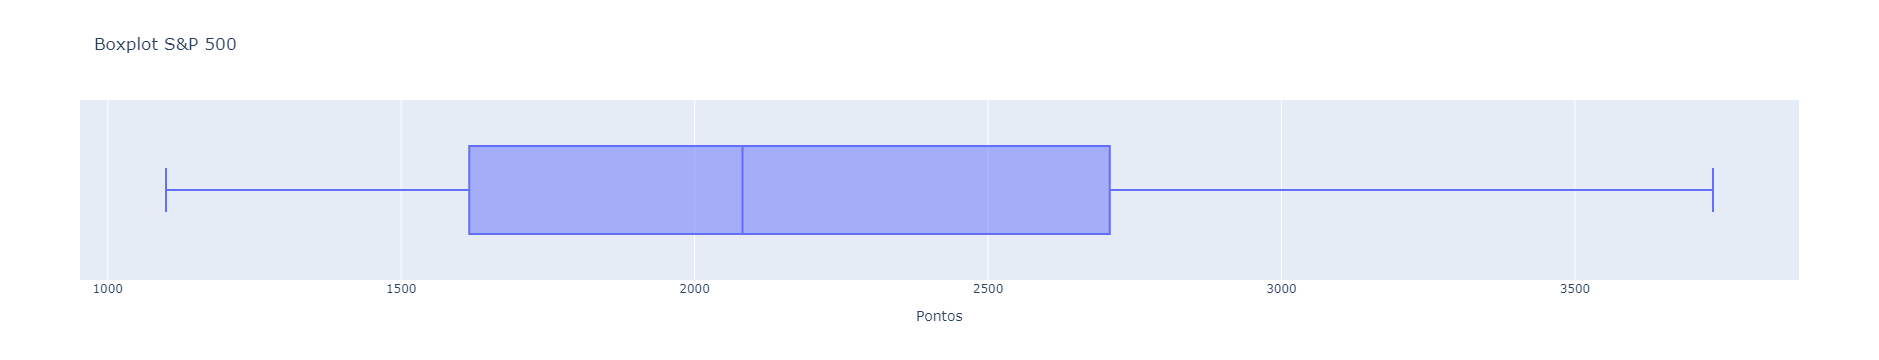

In [88]:
#Verificando os quartis do valor
fig = px.box(df, x="SP500", title="Boxplot S&P 500")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

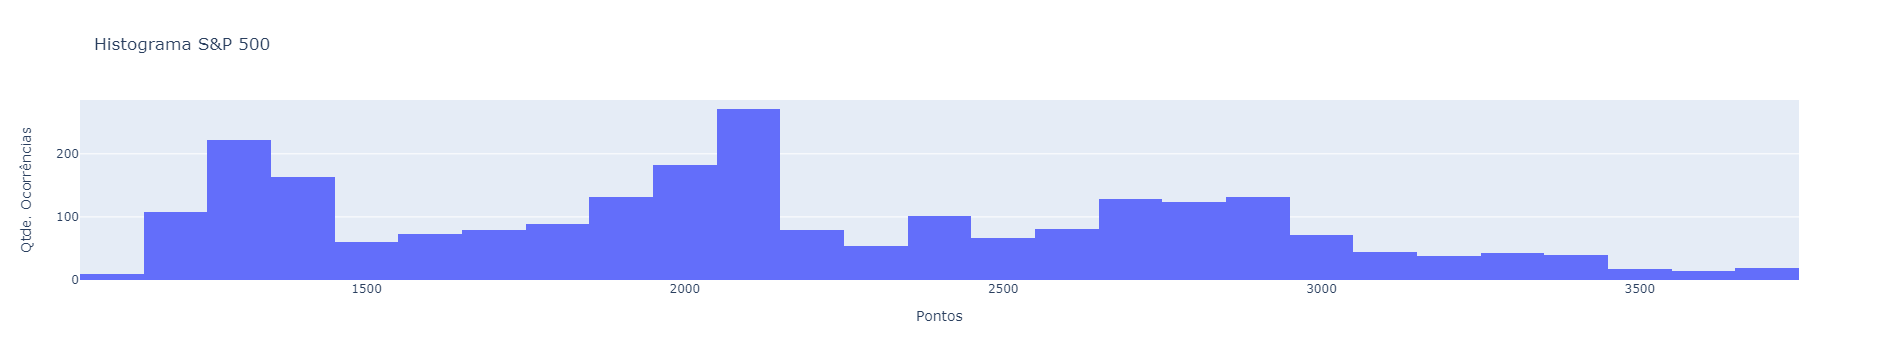

In [89]:
#Verificando range de valores
fig = px.histogram(df, x="SP500", title='Histograma S&P 500')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

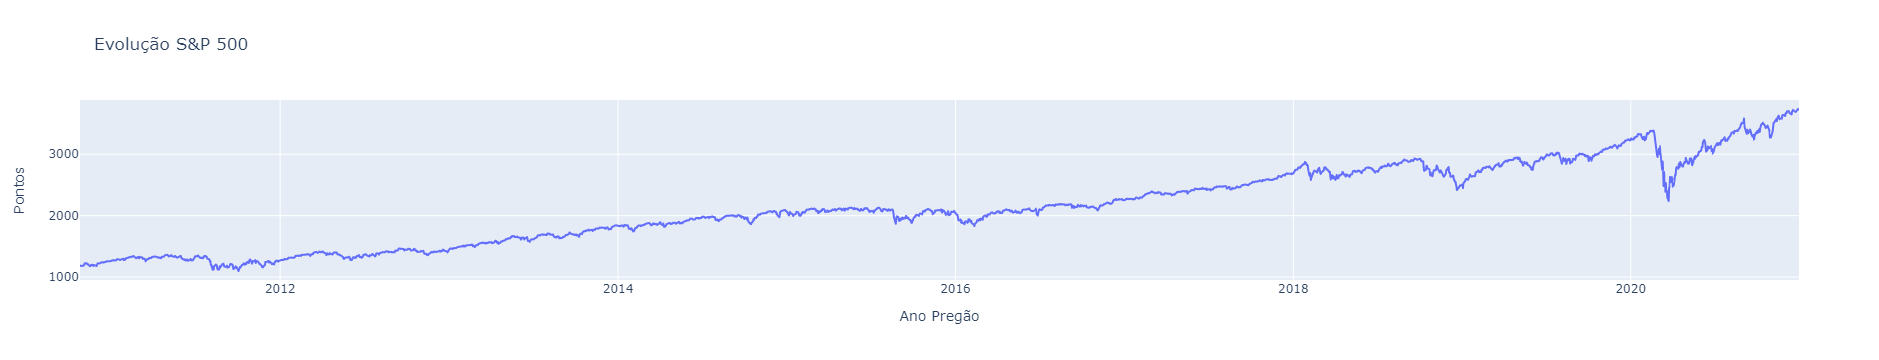

In [90]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="SP500", title='Evolução S&P 500')
fig.update_layout(showlegend=True, yaxis_title="Pontos", xaxis_title="Ano Pregão")
fig.show()

#### BOVESPA

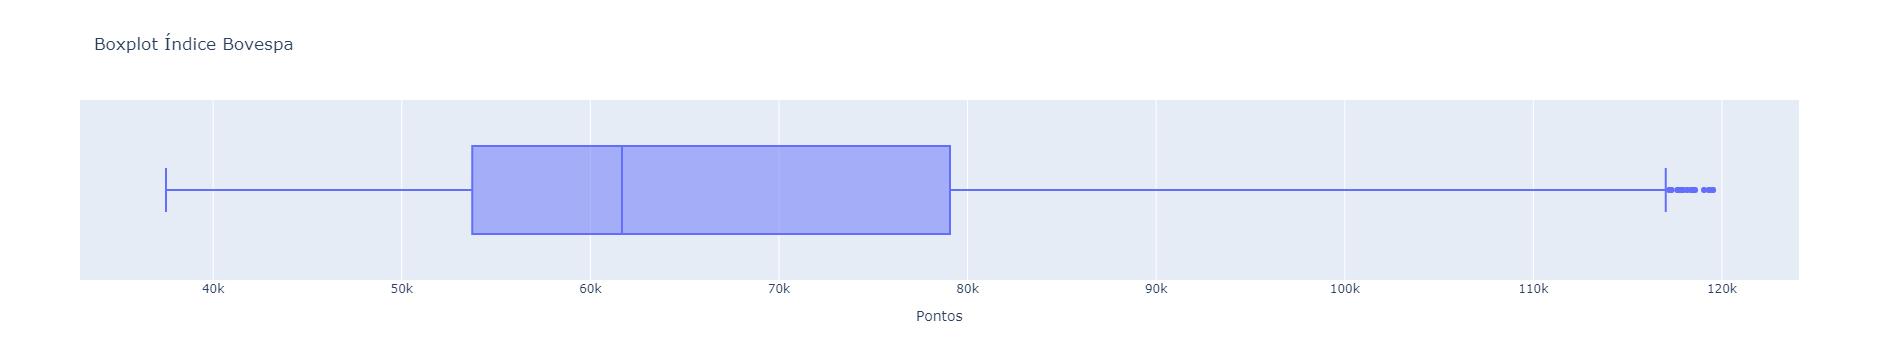

In [91]:
fig = px.box(df, x="BOVESPA", title="Boxplot Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

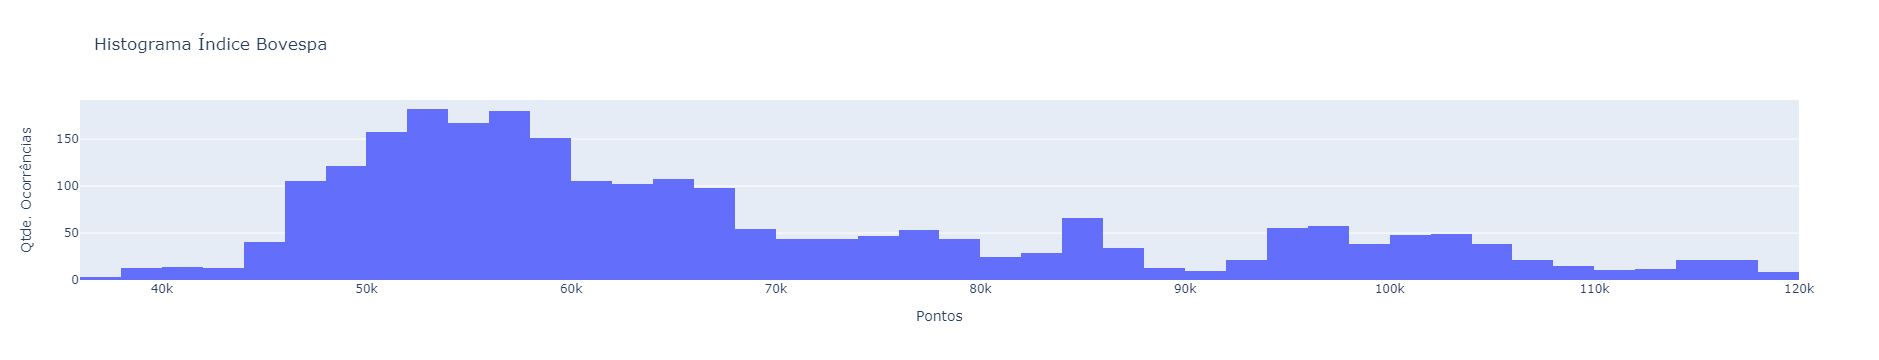

In [92]:
#Verificando range de valores
fig = px.histogram(df, x="BOVESPA", title='Histograma Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

In [93]:
#Há valores fora do quartil onde referem-se ao período de Dezembro de 2019 a Dezembro de 2020 onde houve a ocorrência do Coronavírus causando enorme variação nas bolsas mundiais
#Até o momento faremos a exclusão de dados de 12/2019 em diante
np.unique(df.query("BOVESPA > 113000").index.year), np.count_nonzero(np.unique(df.query("BOVESPA > 113000").index.date)), df.query("BOVESPA > 113000").index.date

(array([2019, 2020], dtype=int64),
 57,
 array([datetime.date(2019, 12, 18), datetime.date(2019, 12, 19),
        datetime.date(2019, 12, 20), datetime.date(2019, 12, 23),
        datetime.date(2019, 12, 26), datetime.date(2019, 12, 27),
        datetime.date(2019, 12, 30), datetime.date(2020, 1, 2),
        datetime.date(2020, 1, 3), datetime.date(2020, 1, 6),
        datetime.date(2020, 1, 7), datetime.date(2020, 1, 8),
        datetime.date(2020, 1, 9), datetime.date(2020, 1, 10),
        datetime.date(2020, 1, 13), datetime.date(2020, 1, 14),
        datetime.date(2020, 1, 15), datetime.date(2020, 1, 16),
        datetime.date(2020, 1, 17), datetime.date(2020, 1, 21),
        datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
        datetime.date(2020, 1, 24), datetime.date(2020, 1, 27),
        datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
        datetime.date(2020, 1, 30), datetime.date(2020, 1, 31),
        datetime.date(2020, 2, 3), datetime.date(2020, 2, 4),
 

In [94]:
df = df.loc['2011-01-01':'2019-11-30']

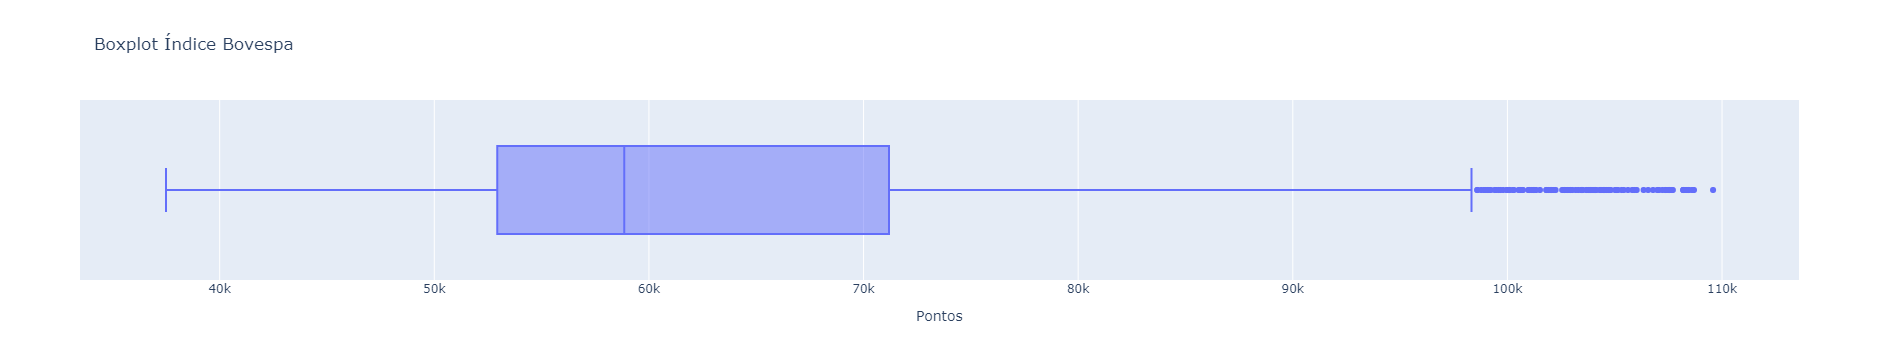

In [95]:
fig = px.box(df, x="BOVESPA", title="Boxplot Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

In [96]:
np.unique(df.query("BOVESPA > 100000").index.year), np.count_nonzero(np.unique(df.query("BOVESPA > 100000").index.date)), df.query("BOVESPA > 100000").index.date

(array([2019], dtype=int64),
 101,
 array([datetime.date(2019, 6, 19), datetime.date(2019, 6, 21),
        datetime.date(2019, 6, 24), datetime.date(2019, 6, 25),
        datetime.date(2019, 6, 26), datetime.date(2019, 6, 27),
        datetime.date(2019, 6, 28), datetime.date(2019, 7, 1),
        datetime.date(2019, 7, 2), datetime.date(2019, 7, 3),
        datetime.date(2019, 7, 5), datetime.date(2019, 7, 8),
        datetime.date(2019, 7, 10), datetime.date(2019, 7, 11),
        datetime.date(2019, 7, 12), datetime.date(2019, 7, 15),
        datetime.date(2019, 7, 16), datetime.date(2019, 7, 17),
        datetime.date(2019, 7, 18), datetime.date(2019, 7, 19),
        datetime.date(2019, 7, 22), datetime.date(2019, 7, 23),
        datetime.date(2019, 7, 24), datetime.date(2019, 7, 25),
        datetime.date(2019, 7, 26), datetime.date(2019, 7, 29),
        datetime.date(2019, 7, 30), datetime.date(2019, 7, 31),
        datetime.date(2019, 8, 1), datetime.date(2019, 8, 2),
        date

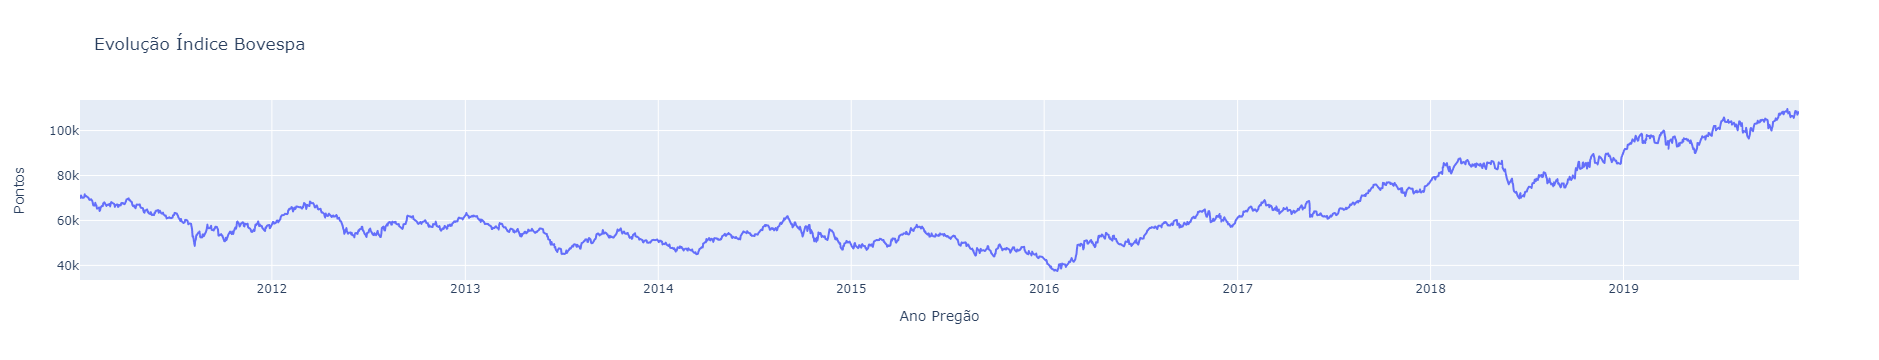

In [97]:
#Verificar período de pico do Índice Bovespa
fig = px.line(df, x=df.index, y="BOVESPA", title='Evolução Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Pontos", xaxis_title="Ano Pregão")
fig.show()

#### OURO


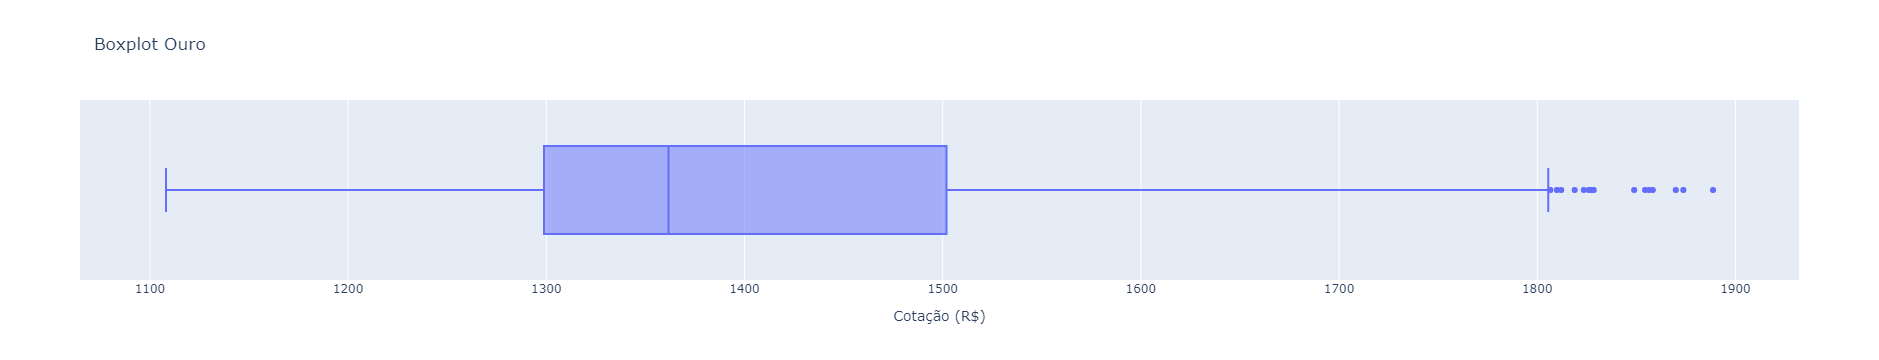

In [98]:
fig = px.box(df, x="OURO", title="Boxplot Ouro")
fig.update_layout(showlegend=True, xaxis_title="Cotação (R$)")
fig.show()

In [99]:
#Geralmente a busca pelo ouro decorre da busca de aplicações consideradas mais seguras como metais preciosos
#Segundo notícias isto ocorreu em 2011: http://g1.globo.com/economia/noticia/2011/08/ouro-supera-a-barreira-de-us-1700-a-onca-pela-primeira-vez.html e continuou por 2012. Em 2020 devido o advendo da pandemia houve também esta maior demanda desses metais preciosos batendo esta cotação de 2012 conforme notícias: https://www.infomoney.com.br/onde-investir/com-a-maior-cotacao-desde-2012-o-que-esperar-do-ouro-daqui-para-frente/
np.unique(df.query("OURO > 1664").index.year), np.count_nonzero(np.unique(df.query("OURO > 1664").index.date))

(array([2011, 2012, 2013], dtype=int64), 198)

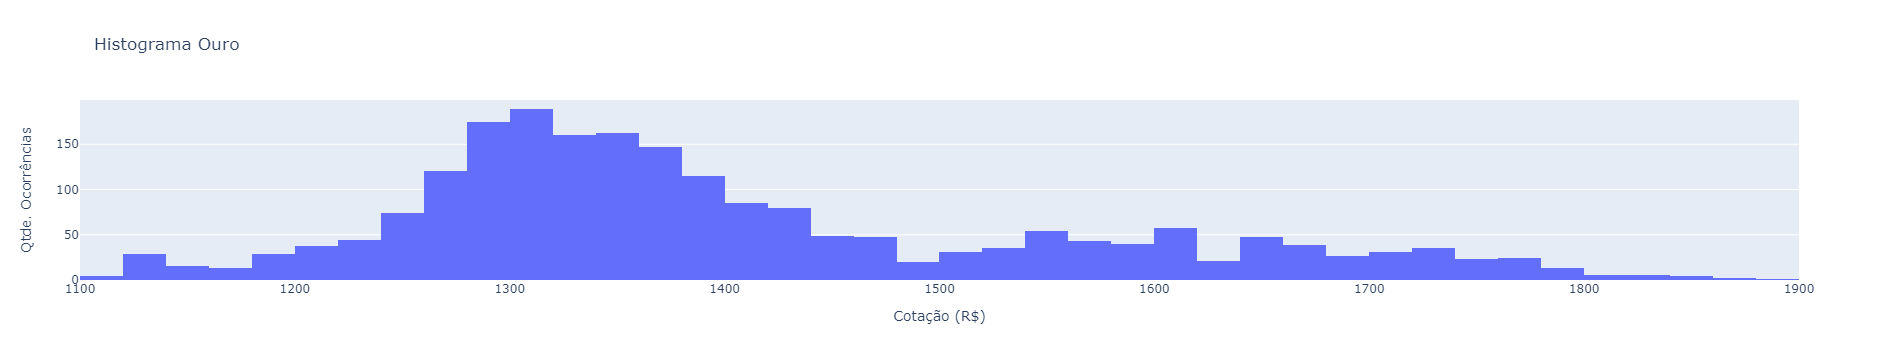

In [100]:
#Verificando range de valores
fig = px.histogram(df, x="OURO", title='Histograma Ouro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (R$)")
fig.show()

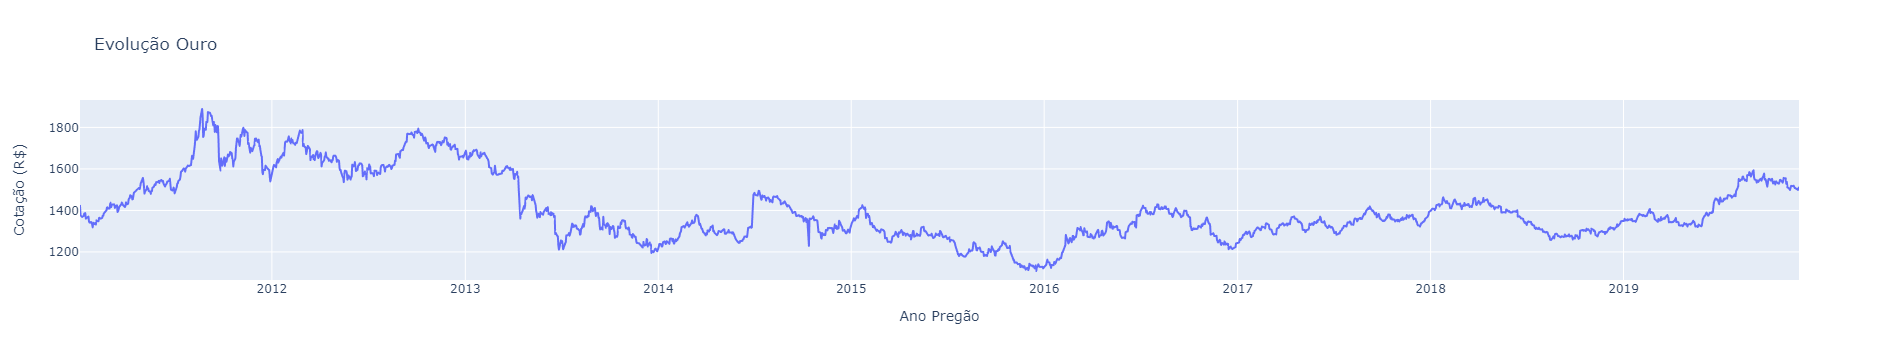

In [101]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="OURO", title='Evolução Ouro')
fig.update_layout(showlegend=True, yaxis_title="Cotação (R$)", xaxis_title="Ano Pregão")
fig.show()

#### PETROLEO
Náo houve a incidência de outliers para o preço do barril do petróleo

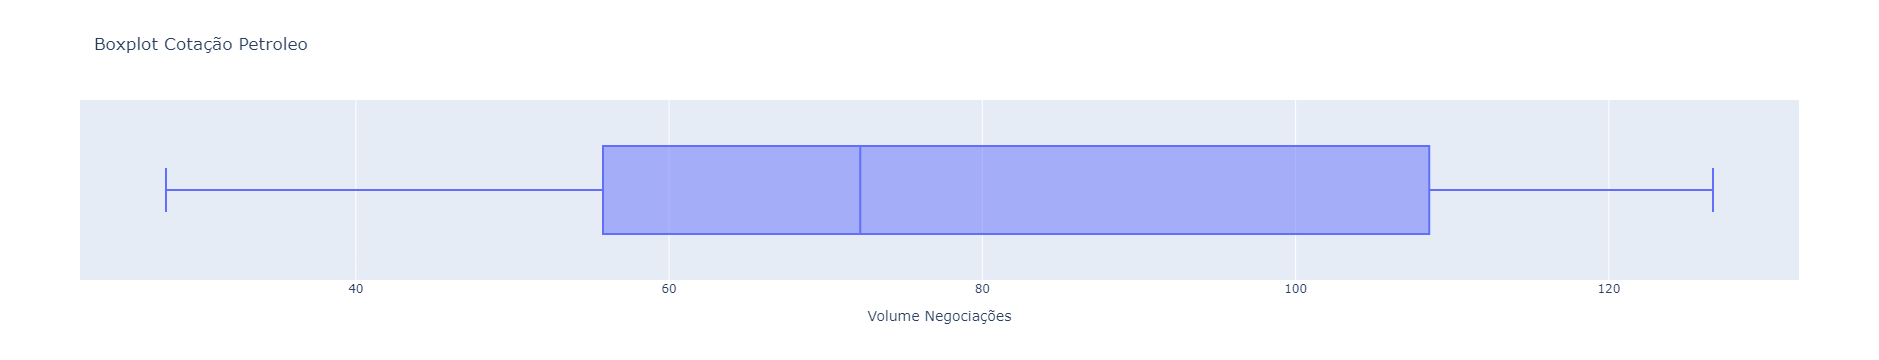

In [102]:
fig = px.box(df, x="PETROLEO", title="Boxplot Cotação Petroleo")
fig.update_layout(showlegend=True, xaxis_title="Volume Negociações")
fig.show()

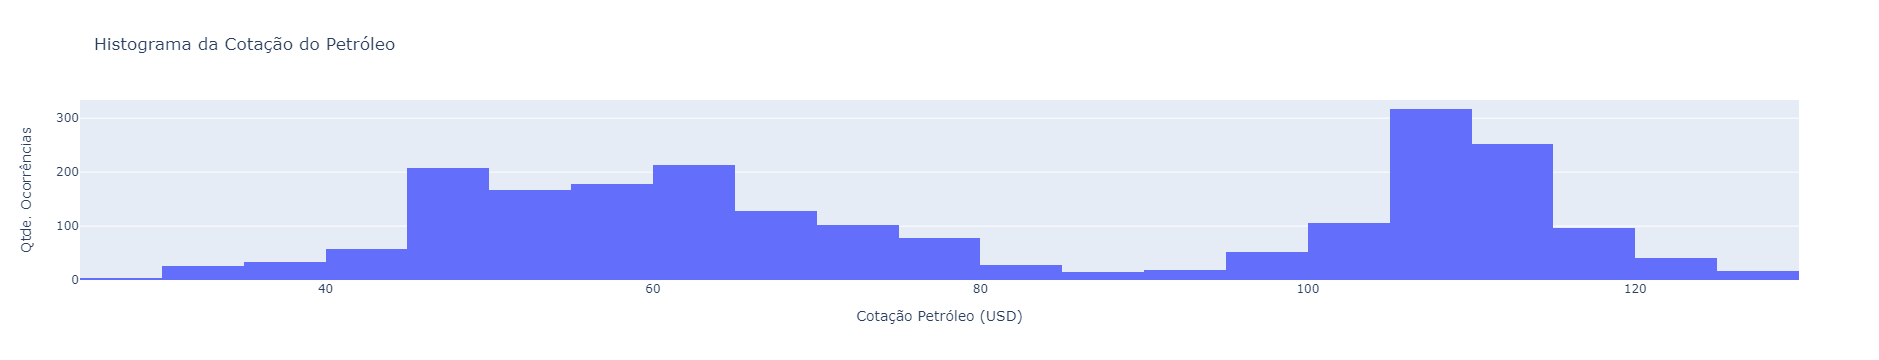

In [103]:
#Verificando range de valores
fig = px.histogram(df, x="PETROLEO", title='Histograma da Cotação do Petróleo')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação Petróleo (USD)")
fig.show()

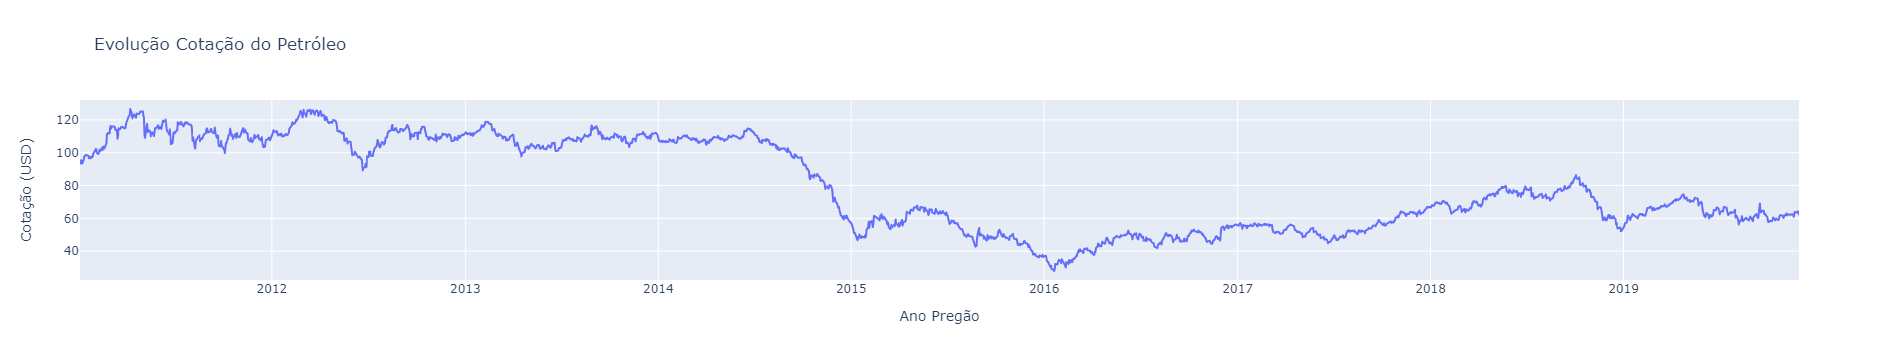

In [104]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="PETROLEO", title='Evolução Cotação do Petróleo')
fig.update_layout(showlegend=True, yaxis_title="Cotação (USD)", xaxis_title="Ano Pregão")
fig.show()

#### FERRO

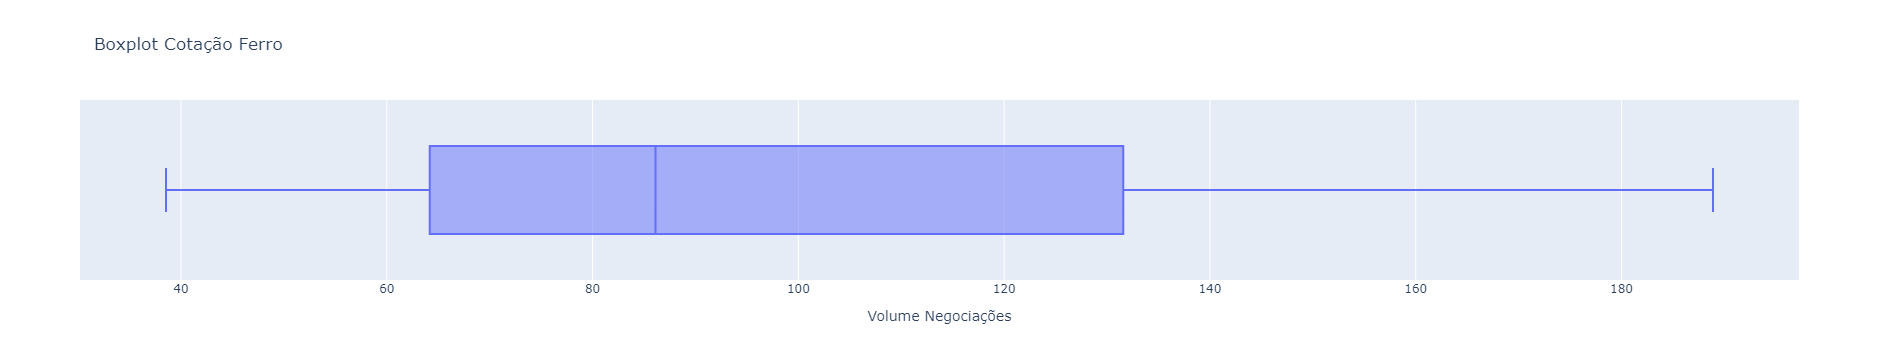

In [105]:
fig = px.box(df, x="FERRO", title="Boxplot Cotação Ferro")
fig.update_layout(showlegend=True, xaxis_title="Volume Negociações")
fig.show()

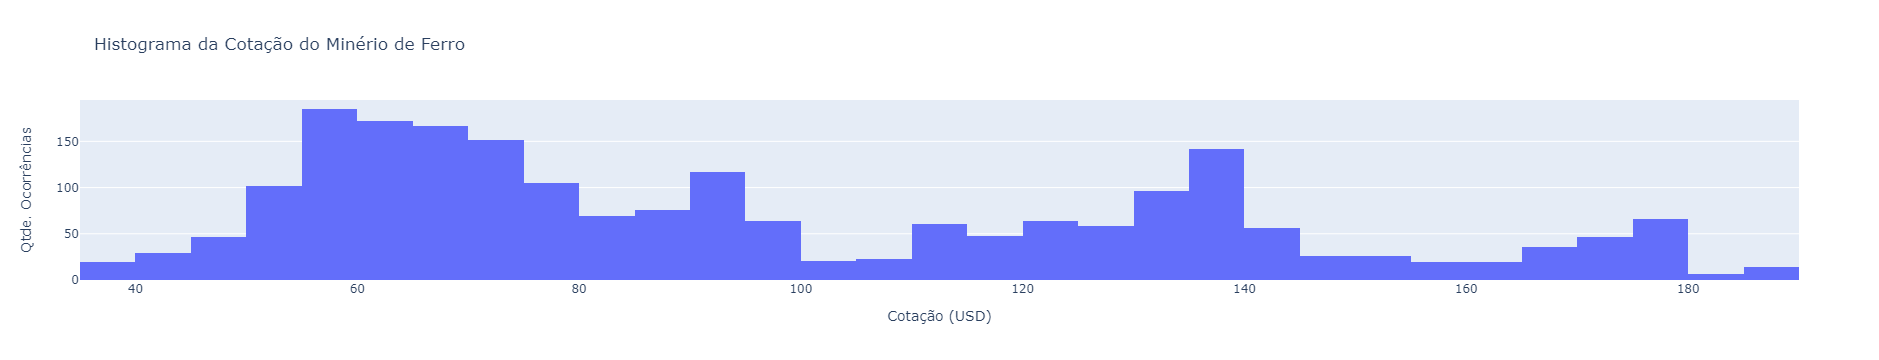

In [106]:
#Verificando range de valores
fig = px.histogram(df, x="FERRO", title='Histograma da Cotação do Minério de Ferro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (USD)")
fig.show()

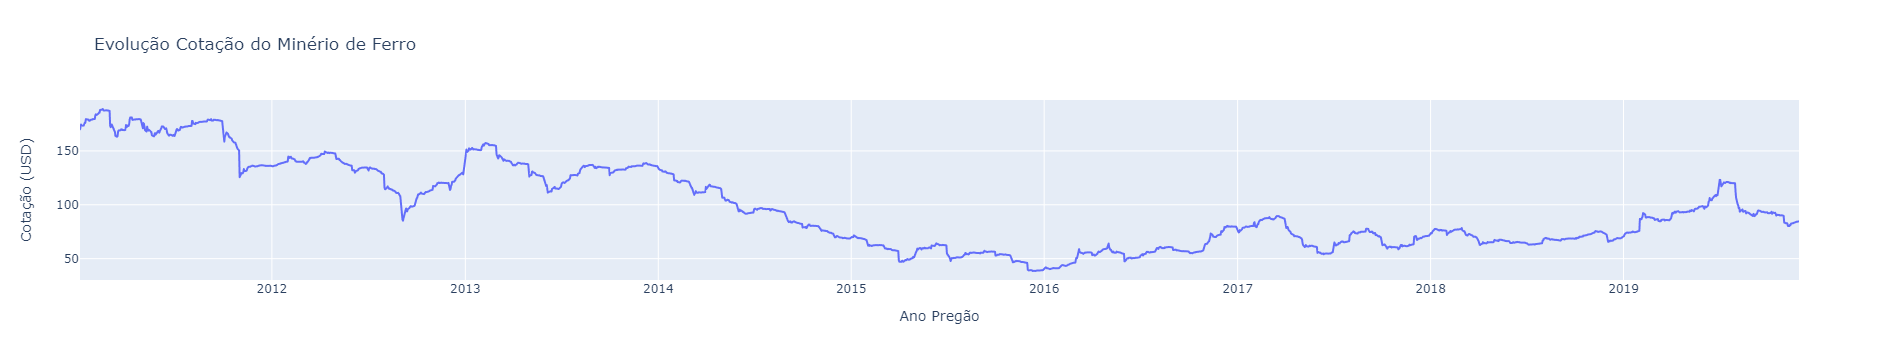

In [107]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="FERRO", title='Evolução Cotação do Minério de Ferro')
fig.update_layout(showlegend=True, yaxis_title="Cotação (USD)", xaxis_title="Ano Pregão")
fig.show()

#### DOLAR
Não foram encontrados outliers para a cotação do Dólar nestes últimos 10 anos

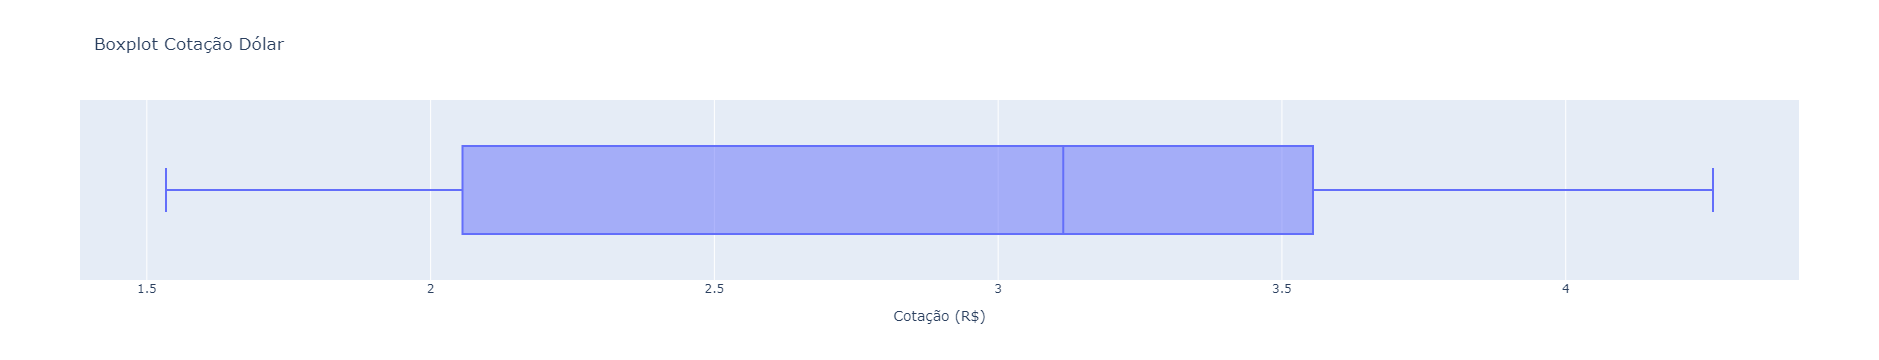

In [108]:
fig = px.box(df, x="DOLAR", title="Boxplot Cotação Dólar")
fig.update_layout(showlegend=True, xaxis_title="Cotação (R$)")
fig.show()

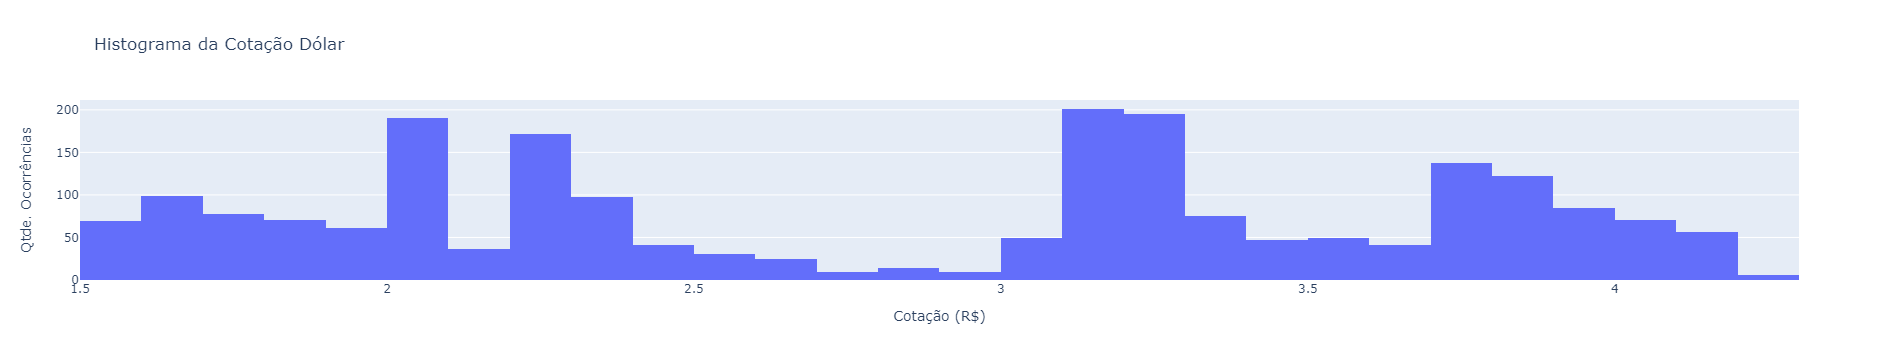

In [109]:
#Verificando range de valores
fig = px.histogram(df, x="DOLAR", title='Histograma da Cotação Dólar')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (R$)")
fig.show()

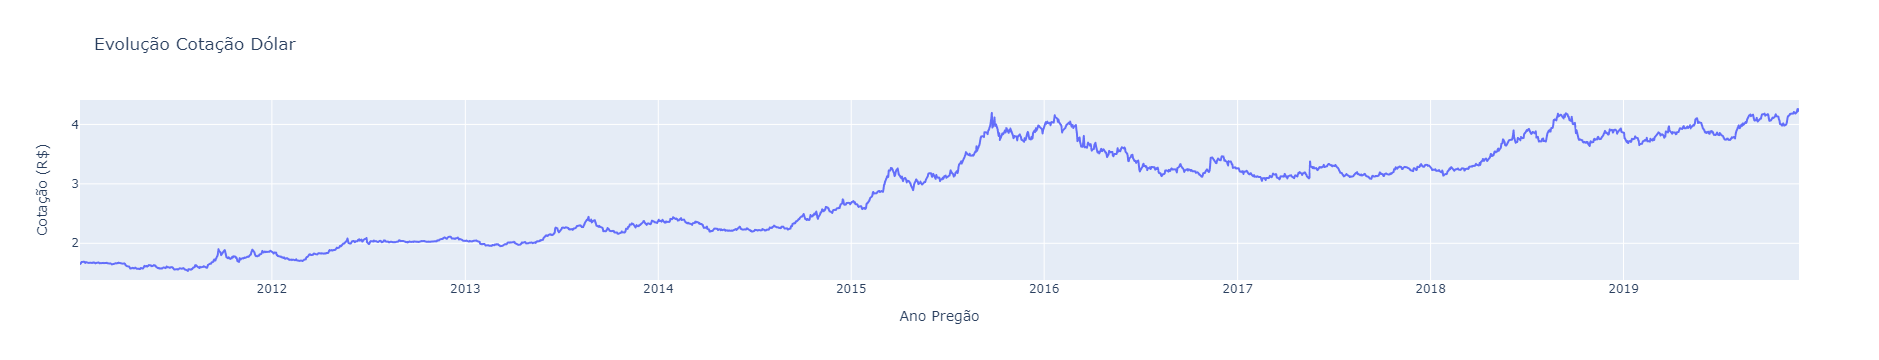

In [110]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="DOLAR", title='Evolução Cotação Dólar')
fig.update_layout(showlegend=True, yaxis_title="Cotação (R$)", xaxis_title="Ano Pregão")
fig.show()

#### SELIC
Não foram encontrados outliers para a cotação da selic nos últimos 10 anos

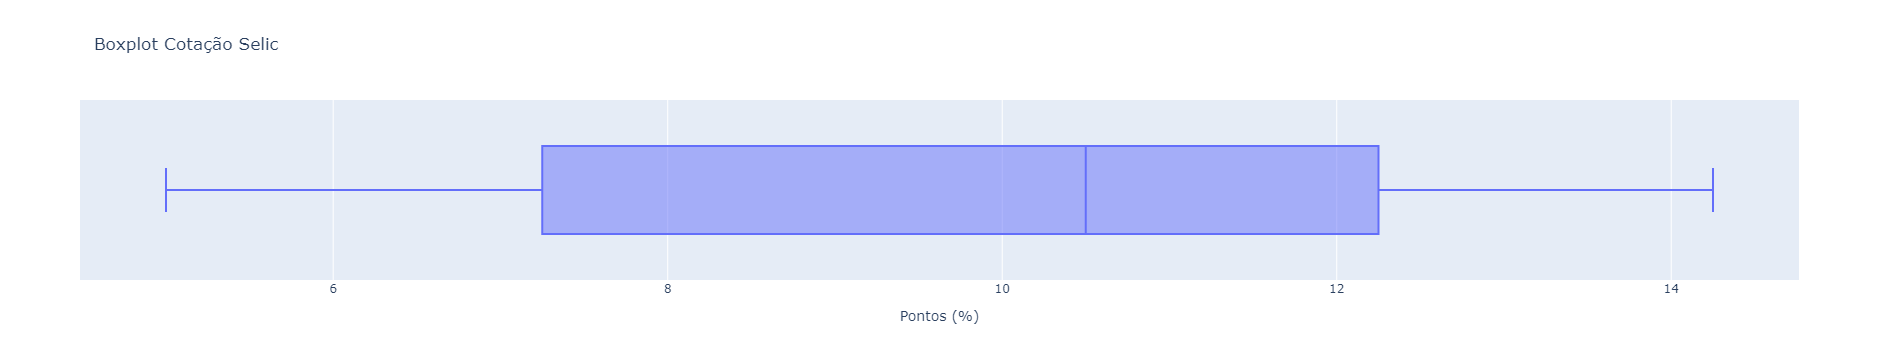

In [111]:
fig = px.box(df, x="SELIC", title="Boxplot Cotação Selic")
fig.update_layout(showlegend=True, xaxis_title="Pontos (%)")
fig.show()

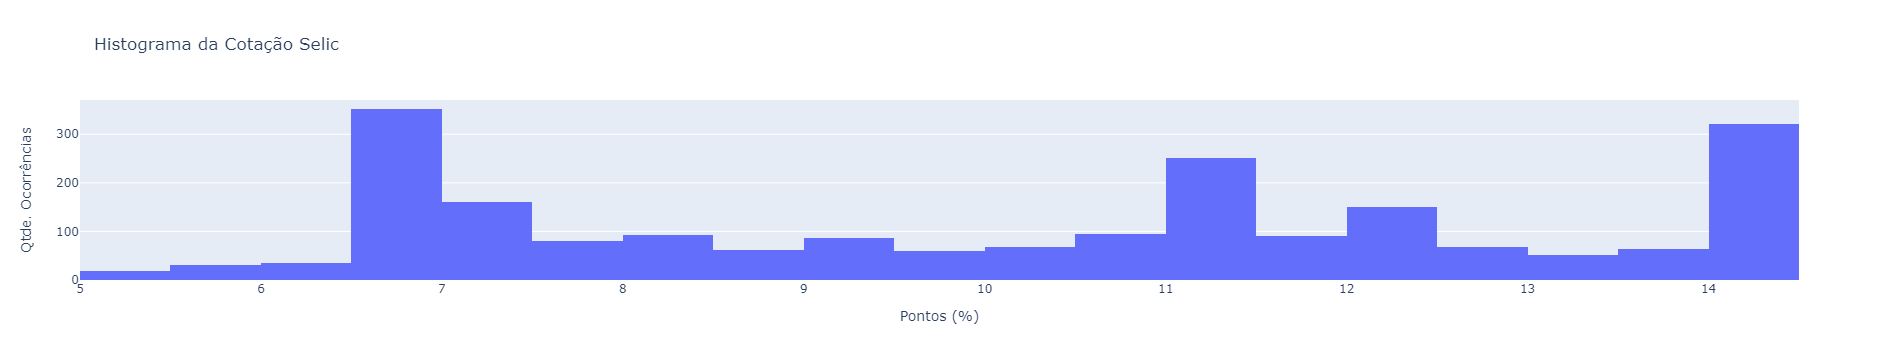

In [112]:
#Verificando range de valores
fig = px.histogram(df, x="SELIC", title='Histograma da Cotação Selic')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos (%)")
fig.show()

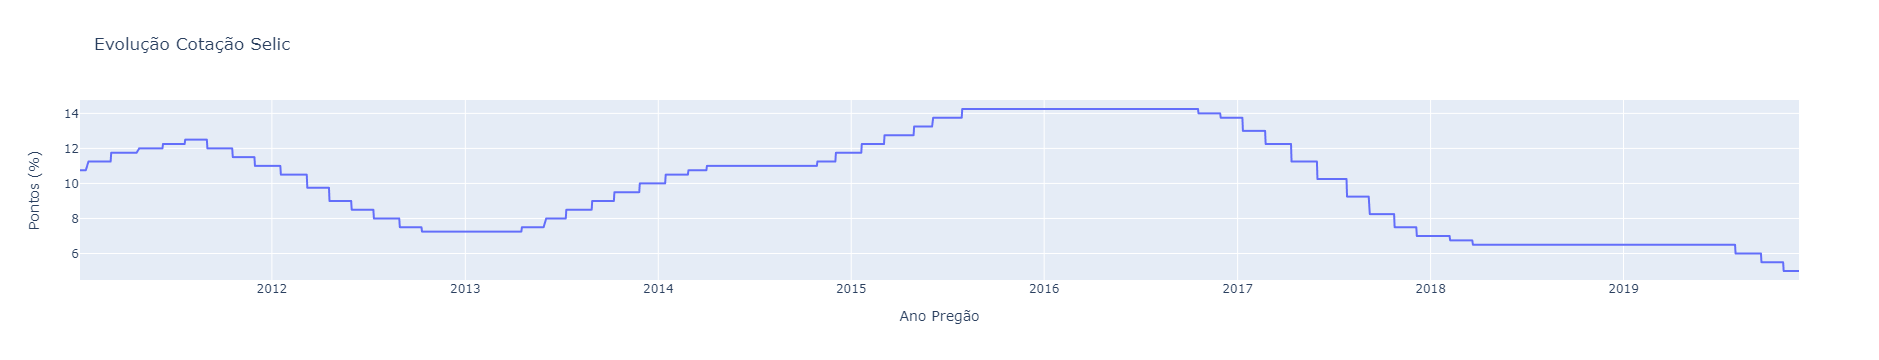

In [113]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="SELIC", title='Evolução Cotação Selic')
fig.update_layout(showlegend=True, yaxis_title="Pontos (%)", xaxis_title="Ano Pregão")
fig.show()

### Correlação Ações com Fatores de influência

In [114]:
corr_vale = vale.join(dolar)
corr_vale = corr_vale.join(ferro)
corr_vale = corr_vale.join(itub)
corr_vale = corr_vale.join(petr4)
corr_vale = corr_vale.join(petroleo)
corr_vale = corr_vale.join(bbdc4)
corr_vale = corr_vale.join(b3)
corr_vale = corr_vale.join(bovespa)

corr_vale['PETROLEO'] = corr_vale.PETROLEO * corr_vale.DOLAR
corr_vale['FERRO'] = corr_vale.FERRO * corr_vale.DOLAR


corr_vale.corr()

VALE     DOLAR     FERRO      ITUB     PETR4  PETROLEO  \
VALE      1.000000  0.165550  0.739720  0.406936  0.803909  0.430009   
DOLAR     0.165550  1.000000  0.562924  0.751789  0.022700  0.250169   
FERRO     0.739720  0.562924  1.000000  0.439625  0.562124  0.350861   
ITUB      0.406936  0.751789  0.439625  1.000000  0.450585  0.441631   
PETR4     0.803909  0.022700  0.562124  0.450585  1.000000  0.379111   
PETROLEO  0.430009  0.250169  0.350861  0.441631  0.379111  1.000000   
BBDC4     0.389431  0.712851  0.445032  0.986418  0.463963  0.470304   
B3        0.546063  0.835179  0.810863  0.824160  0.469223  0.370802   
BOVESPA   0.742484  0.584166  0.691618  0.861896  0.766374  0.417855   

             BBDC4        B3   BOVESPA  
VALE      0.389431  0.546063  0.742484  
DOLAR     0.712851  0.835179  0.584166  
FERRO     0.445032  0.810863  0.691618  
ITUB      0.986418  0.824160  0.861896  
PETR4     0.463963  0.469223  0.766374  
PETROLEO  0.470304  0.370802  0.417855  
BBDC4     1.000000  0.815029  0.857798  
B3        0.815029  1.000000  0.879581  
BOVESPA   0.857798  0.879581  1.000000

<AxesSubplot:>

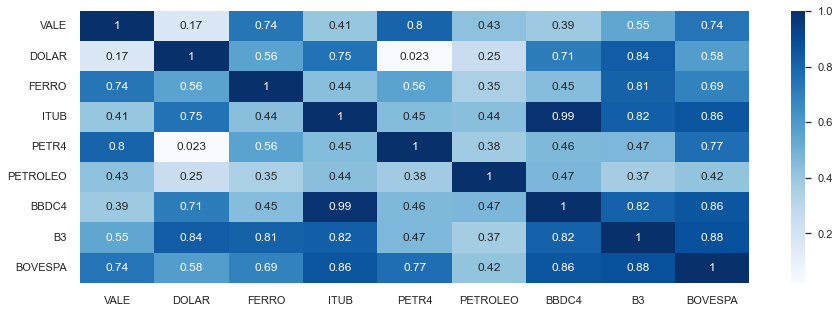

In [115]:
sns.heatmap(corr_vale.corr(), annot=True, cmap="Blues" )

## Feature engineering

### Criando métricas auxiliares

#### Métricas para cálculo

In [116]:
#Criando médias móveis para os dados
df['SP500_MM_30'] = df.SP500.rolling(30).mean().shift()
df['BOVESPA_MM_30'] = df.BOVESPA.rolling(30).mean().shift()
df['OURO_MM_30'] = df.OURO.rolling(30).mean().shift()
df['PETROLEO_MM_30'] = df.PETROLEO.rolling(30).mean().shift()
df['FERRO_MM_30'] = df.FERRO.rolling(30).mean().shift()
df['DOLAR_MM_30'] = df.DOLAR.rolling(30).mean().shift()
df['SELIC_MM_30'] = df.SELIC.rolling(30).mean().shift()
df['BOVESPA_MM_30'] = df.BOVESPA.rolling(30).mean().shift()

#Setar o fechamento do dia anterior
df['SP500_FECHAMENTO_ANTERIOR'] = df.SP500.shift(1)
df['BOVESPA_FECHAMENTO_ANTERIOR'] = df.BOVESPA.shift(1)
df['OURO_FECHAMENTO_ANTERIOR'] = df.OURO.shift(1)
df['PETROLEO_FECHAMENTO_ANTERIOR'] = df.PETROLEO.shift(1)
df['FERRO_FECHAMENTO_ANTERIOR'] = df.FERRO.shift(1)
df['DOLAR_FECHAMENTO_ANTERIOR'] = df.DOLAR.shift(1)
df['SELIC_FECHAMENTO_ANTERIOR'] = df.SELIC.shift(1)
df['BOVESPA_FECHAMENTO_ANTERIOR'] = df.BOVESPA.shift(1)

In [117]:
#Para setar o resultado esperado criaremos estas variáveis para verificação
df['SP500_RESULT_30'] = df.SP500.shift(-30)
df['BOVESPA_RESULT_30'] = df.BOVESPA.shift(-30)
df['OURO_RESULT_30'] = df.OURO.shift(-30)
df['PETROLEO_RESULT_30'] = df.PETROLEO.shift(-30)
df['FERRO_RESULT_30'] = df.FERRO.shift(-30)
df['DOLAR_RESULT_30'] = df.DOLAR.shift(-30)
df['SELIC_RESULT_30'] = df.SELIC.shift(-30)

#Criando métricas condicionais para medir o retorno mínimo esperado e o maior retorno dentre os pilares de investimento
df['SP500_RESULT_DIFF'] = ((df.SP500_RESULT_30 / df.SP500) - 1) * 100
df['BOVESPA_RESULT_DIFF'] = ((df.BOVESPA_RESULT_30 / df.BOVESPA) - 1) * 100
df['OURO_RESULT_DIFF'] = ((df.OURO_RESULT_30 / df.OURO) - 1) * 100
df['DOLAR_RESULT_DIFF'] = ((df.DOLAR_RESULT_30 / df.DOLAR) - 1) * 100
df['SELIC_RESULT_DIFF'] = ((df.SELIC_RESULT_30 / df.SELIC) - 1) * 100

In [118]:
#Devido à inclusão das métricas acima, algumas colunas apresentarão os dados nulos para os primeiros 30 registros e para outras colunas nos últimos registros 
df.isnull().values.any(), df.shape

(True, (2133, 33))

In [119]:
#Faremos a exclusão delas
df = df.dropna()

In [120]:
df.shape

(2073, 33)

### Calculando o resultado esperado
0 - Não fazer nada
1 - Aplicar no índice Bovespa
2 - Aplicar em Dólar
3 - Aplicar em Ouro
4 - Aplicar em Selic
5 - ETF SP&500

In [121]:
# Gerar a métrica de resultados de acordo com os itens que foram definidos
condicoes = [    
(df['BOVESPA_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > 5)
, (df['DOLAR_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > 5)
, (df['OURO_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > 5)
, (df['SELIC_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > 5)
, (df['SP500_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > 5)
]

valores = [1, 2, 3, 4, 5]
descritivos_target = ['NÃO FAZER NADA','ÍNDICE BOVESPA','DÓLAR','OURO','SELIC','SP&500']

df['RESULTADO'] = 0
df['RESULTADO'] = np.select(condicoes, valores)

In [122]:
#Validação da distribuição do Target
df_count_acao = df['RESULTADO'].value_counts().to_frame()
df_count_acao.reset_index(inplace=True)
df_count_acao['ACAO'] = df_count_acao['index'].apply(lambda x: descritivos_target[x])
total = df_count_acao.RESULTADO.sum()
df_count_acao['SHARE'] = df_count_acao['RESULTADO'].apply(lambda x: (x/total)*100)
df_count_acao, total

(   index  RESULTADO            ACAO      SHARE
 0      0        692  NÃO FAZER NADA  33.381573
 1      1        529  ÍNDICE BOVESPA  25.518572
 2      2        432           DÓLAR  20.839363
 3      3        204            OURO   9.840810
 4      5        137          SP&500   6.608780
 5      4         79           SELIC   3.810902,
 2073)

In [123]:
#Primeiro arquivo de saída gerado para conferência
df.to_csv('saida/00_conferência.csv')

In [124]:
df.columns

Index(['SP500', 'BOVESPA', 'OURO', 'PETROLEO', 'FERRO', 'DOLAR', 'SELIC',
       'SP500_MM_30', 'BOVESPA_MM_30', 'OURO_MM_30', 'PETROLEO_MM_30',
       'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30',
       'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
       'OURO_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
       'FERRO_FECHAMENTO_ANTERIOR', 'DOLAR_FECHAMENTO_ANTERIOR',
       'SELIC_FECHAMENTO_ANTERIOR', 'SP500_RESULT_30', 'BOVESPA_RESULT_30',
       'OURO_RESULT_30', 'PETROLEO_RESULT_30', 'FERRO_RESULT_30',
       'DOLAR_RESULT_30', 'SELIC_RESULT_30', 'SP500_RESULT_DIFF',
       'BOVESPA_RESULT_DIFF', 'OURO_RESULT_DIFF', 'DOLAR_RESULT_DIFF',
       'SELIC_RESULT_DIFF', 'RESULTADO'],
      dtype='object')

In [125]:
#Apagando colunas utilizadas para calcular o resultado e que não serão utilizadas na predição
df_predicao = df.drop(['SP500', 'BOVESPA', 'OURO', 'PETROLEO', 'FERRO', 'DOLAR'
                            , 'SELIC', 'SP500_RESULT_30', 'BOVESPA_RESULT_30', 'OURO_RESULT_30'
                            , 'PETROLEO_RESULT_30', 'FERRO_RESULT_30', 'DOLAR_RESULT_30', 'SELIC_RESULT_30', 'SP500_RESULT_DIFF'
                            , 'BOVESPA_RESULT_DIFF', 'OURO_RESULT_DIFF', 'DOLAR_RESULT_DIFF', 'SELIC_RESULT_DIFF'                      
                      ], axis='columns')

In [126]:
df_predicao.reset_index(inplace=True)

In [127]:
df_predicao.drop('DATA_PREGAO', axis='columns', inplace=True)

In [128]:
#Comparando as colunas dos dataframes mostrando as colunas a serem utilizadas para a predição
df.columns, df_predicao.columns

(Index(['SP500', 'BOVESPA', 'OURO', 'PETROLEO', 'FERRO', 'DOLAR', 'SELIC',
        'SP500_MM_30', 'BOVESPA_MM_30', 'OURO_MM_30', 'PETROLEO_MM_30',
        'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30',
        'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
        'OURO_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
        'FERRO_FECHAMENTO_ANTERIOR', 'DOLAR_FECHAMENTO_ANTERIOR',
        'SELIC_FECHAMENTO_ANTERIOR', 'SP500_RESULT_30', 'BOVESPA_RESULT_30',
        'OURO_RESULT_30', 'PETROLEO_RESULT_30', 'FERRO_RESULT_30',
        'DOLAR_RESULT_30', 'SELIC_RESULT_30', 'SP500_RESULT_DIFF',
        'BOVESPA_RESULT_DIFF', 'OURO_RESULT_DIFF', 'DOLAR_RESULT_DIFF',
        'SELIC_RESULT_DIFF', 'RESULTADO'],
       dtype='object'),
 Index(['SP500_MM_30', 'BOVESPA_MM_30', 'OURO_MM_30', 'PETROLEO_MM_30',
        'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30',
        'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
        'OURO_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENT

In [129]:
#Setando colunas usadas para a predição
descritivos_fatores = df_predicao.columns.to_list()[0:-1]
len(descritivos_fatores)

14

## Submissão aos algorítmos

### Separação de Dados e Target

In [130]:
df_predicao.columns

Index(['SP500_MM_30', 'BOVESPA_MM_30', 'OURO_MM_30', 'PETROLEO_MM_30',
       'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30',
       'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
       'OURO_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
       'FERRO_FECHAMENTO_ANTERIOR', 'DOLAR_FECHAMENTO_ANTERIOR',
       'SELIC_FECHAMENTO_ANTERIOR', 'RESULTADO'],
      dtype='object')

In [131]:
df_predicao.describe()

SP500_MM_30  BOVESPA_MM_30   OURO_MM_30  PETROLEO_MM_30  FERRO_MM_30  \
count  2073.000000    2073.000000  2073.000000     2073.000000  2073.000000   
mean   2030.189584   63157.682505  1404.556249       80.302352    96.573857   
std     523.406536   14891.689094   153.653005       27.094096    38.515007   
min    1170.328667   39858.266667  1128.000008       32.417667    39.680334   
25%    1562.822000   52863.733333  1299.783333       55.332666    64.679000   
50%    2040.489333   58312.066667  1357.866667       73.435333    84.727332   
75%    2459.500333   67626.400000  1479.996663      109.004000   132.631332   
max    2978.019667  103190.766667  1807.516671      124.354334   183.553334   

       DOLAR_MM_30  SELIC_MM_30  SP500_FECHAMENTO_ANTERIOR  \
count  2073.000000  2073.000000                2073.000000   
mean      2.833443    10.162498                2041.734674   
std       0.787677     2.778680                 526.776913   
min       1.568523     5.700000                1099.230000   
25%       2.055960     7.250000                1585.160000   
50%       3.113853    10.583333                2047.620000   
75%       3.518457    12.358333                2467.700000   
max       4.123537    14.250000                3025.860000   

       BOVESPA_FECHAMENTO_ANTERIOR  OURO_FECHAMENTO_ANTERIOR  \
count                  2073.000000               2073.000000   
mean                  63409.280270               1405.892578   
std                   15374.674079                157.524338   
min                   37497.000000               1108.099976   
25%                   52760.000000               1297.000000   
50%                   58407.000000               1359.699951   
75%                   69176.000000               1492.199951   
max                  105817.000000               1888.699951   

       PETROLEO_FECHAMENTO_ANTERIOR  FERRO_FECHAMENTO_ANTERIOR  \
count                   2073.000000                2073.000000   
mean                      80.027260                  95.944122   
std                       27.265911                  38.089642   
min                       27.879999                  38.540001   
25%                       55.470001                  63.680000   
50%                       72.279999                  85.650002   
75%                      108.699997                 130.630005   
max                      126.650002                 187.800003   

       DOLAR_FECHAMENTO_ANTERIOR  SELIC_FECHAMENTO_ANTERIOR    RESULTADO  
count                2073.000000                2073.000000  2073.000000  
mean                    2.850571                  10.123251     1.450072  
std                     0.791496                   2.809193     1.461059  
min                     1.533700                   5.500000     0.000000  
25%                     2.074600                   7.250000     0.000000  
50%                     3.113800                  10.500000     1.000000  
75%                     3.535600                  12.250000     2.000000  
max                     4.194200                  14.250000     5.000000

In [132]:
#Separando os valores do resultado
x_df_predicao = df_predicao.iloc[:,0:13].values
y_df_predicao = df_predicao.iloc[:,14:15].values

In [133]:
x_df_predicao

array([[1.29693100e+03, 6.82262667e+04, 1.36051333e+03, ...,
        1.03779999e+02, 1.87800003e+02, 1.66960001e+00],
       [1.29921633e+03, 6.81503667e+04, 1.35925000e+03, ...,
        1.02589996e+02, 1.87500000e+02, 1.66530001e+00],
       [1.30164333e+03, 6.80753333e+04, 1.35957333e+03, ...,
        1.02519997e+02, 1.87500000e+02, 1.66690004e+00],
       ...,
       [2.96246800e+03, 1.02938100e+05, 1.55152001e+03, ...,
        5.90999985e+01, 9.30100021e+01, 4.11390018e+00],
       [2.96399100e+03, 1.03048367e+05, 1.55018334e+03, ...,
        6.05099983e+01, 9.28600006e+01, 4.10540009e+00],
       [2.96531400e+03, 1.03153933e+05, 1.54938334e+03, ...,
        5.93499985e+01, 9.22300034e+01, 4.12570000e+00]])

In [134]:
y_df_predicao

array([[0],
       [3],
       [0],
       ...,
       [5],
       [5],
       [0]])

### Standarização dos dados

In [135]:
#Standarização dos valores
scaler_df = StandardScaler()

In [136]:
x_df_predicao [1:5]

array([[1.29921633e+03, 6.81503667e+04, 1.35925000e+03, 9.89926666e+01,
        1.80790000e+02, 1.67209334e+00, 1.11000000e+01, 1.34043000e+03,
        6.76850000e+04, 1.38469995e+03, 1.02589996e+02, 1.87500000e+02,
        1.66530001e+00],
       [1.30164333e+03, 6.80753333e+04, 1.35957333e+03, 9.92923332e+01,
        1.81303334e+02, 1.67249667e+00, 1.11166667e+01, 1.34301000e+03,
        6.80670000e+04, 1.38819995e+03, 1.02519997e+02, 1.87500000e+02,
        1.66690004e+00],
       [1.30293933e+03, 6.79203000e+04, 1.36047666e+03, 9.96349998e+01,
        1.81743333e+02, 1.67243333e+00, 1.11333333e+01, 1.31544000e+03,
        6.64400000e+04, 1.40050000e+03, 1.05779999e+02, 1.87699997e+02,
        1.66859996e+00],
       [1.30405767e+03, 6.77980000e+04, 1.36187666e+03, 1.00192667e+02,
        1.82213334e+02, 1.67197667e+00, 1.11500000e+01, 1.30740000e+03,
        6.69100000e+04, 1.41340002e+03, 1.11250000e+02, 1.87600006e+02,
        1.67120004e+00]])

In [137]:
x_df_predicao = scaler_df.fit_transform(x_df_predicao)

In [138]:
x_df_predicao [1:5]

array([[-1.39690579,  0.33534737, -0.29493195,  0.68999624,  2.18710755,
        -1.47475352,  0.33747254, -1.3316337 ,  0.27816859, -0.13455877,
         0.82770697,  2.4042759 , -1.497866  ],
       [-1.39226774,  0.33030755, -0.29282714,  0.70105912,  2.2004389 ,
        -1.47424135,  0.34347204, -1.3267348 ,  0.30302064, -0.11233462,
         0.82513906,  2.4042759 , -1.49584399],
       [-1.38979106,  0.31989431, -0.28694668,  0.71370946,  2.21186577,
        -1.47432177,  0.34947154, -1.37908458,  0.19717172, -0.03423232,
         0.94473117,  2.40952786, -1.49369574],
       [-1.3876539 ,  0.3116797 , -0.27783305,  0.73429702,  2.22407176,
        -1.47490168,  0.35547104, -1.39435089,  0.22774885,  0.04767968,
         1.14539638,  2.40690208, -1.49040993]])

### Gerando os dados de Treinamento e Testes

In [139]:
#Gerando os dados de testes e treinamento em 30%/70%
x_df_treinamento, x_df_teste, y_df_treinamento, y_df_teste = train_test_split(x_df_predicao, y_df_predicao, test_size = 0.30, random_state = 0)

In [140]:
x_df_treinamento.shape, y_df_treinamento.shape

((1451, 13), (1451, 1))

In [141]:
x_df_teste.shape, y_df_teste.shape

((622, 13), (622, 1))

### Aplicação dos algorítmos

#### Árvore

In [142]:
arvore_df_predicao = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_df_predicao.fit(x_df_treinamento, y_df_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [143]:
tree_df_previsores = arvore_df_predicao.predict(x_df_teste)
tree_df_previsores

array([1, 2, 1, 5, 2, 1, 3, 2, 4, 2, 5, 2, 0, 3, 0, 2, 1, 0, 2, 1, 0, 1,
       0, 1, 0, 2, 0, 0, 3, 5, 5, 0, 2, 3, 0, 0, 4, 1, 1, 1, 2, 2, 0, 2,
       5, 4, 0, 3, 0, 2, 0, 2, 5, 1, 0, 0, 0, 1, 2, 1, 0, 3, 0, 0, 0, 2,
       2, 3, 2, 0, 2, 0, 3, 4, 1, 4, 1, 2, 1, 0, 4, 2, 2, 0, 0, 2, 3, 0,
       1, 2, 1, 4, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 5, 5, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 1, 1, 5, 1, 0, 3, 5, 0, 1, 2, 2, 2,
       5, 2, 2, 3, 0, 4, 2, 5, 3, 2, 1, 1, 4, 2, 0, 2, 3, 0, 0, 1, 0, 2,
       0, 3, 0, 0, 1, 0, 3, 1, 4, 3, 5, 1, 1, 1, 2, 0, 0, 2, 5, 0, 0, 5,
       2, 1, 1, 1, 5, 0, 2, 1, 2, 0, 0, 1, 0, 1, 4, 3, 2, 0, 3, 2, 2, 1,
       3, 1, 3, 2, 1, 0, 1, 5, 1, 0, 4, 2, 2, 3, 0, 0, 2, 0, 1, 3, 0, 1,
       0, 0, 1, 2, 0, 3, 0, 0, 1, 0, 2, 2, 0, 5, 1, 3, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 2, 5, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0,
       0, 1, 2, 0, 1, 5, 2, 0, 0, 2, 1, 5, 2, 0, 0, 3, 0, 2, 2, 2, 0, 1,
       0, 5, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0,

In [144]:
accuracy_score(y_df_teste, tree_df_previsores)

0.8118971061093248

0.8118971061093248

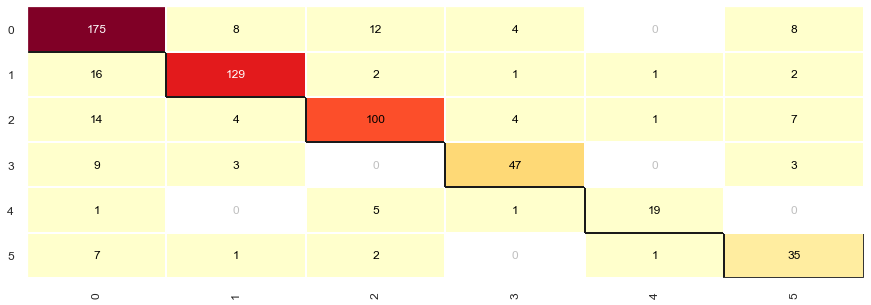

In [145]:
cm = ConfusionMatrix(arvore_df_predicao)
cm.fit(x_df_treinamento, y_df_treinamento)
cm.score(x_df_teste, y_df_teste)

In [146]:
print(classification_report(y_df_teste, tree_df_previsores))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       207
           1       0.89      0.85      0.87       151
           2       0.83      0.77      0.80       130
           3       0.82      0.76      0.79        62
           4       0.86      0.73      0.79        26
           5       0.64      0.76      0.69        46

    accuracy                           0.81       622
   macro avg       0.80      0.79      0.79       622
weighted avg       0.82      0.81      0.81       622



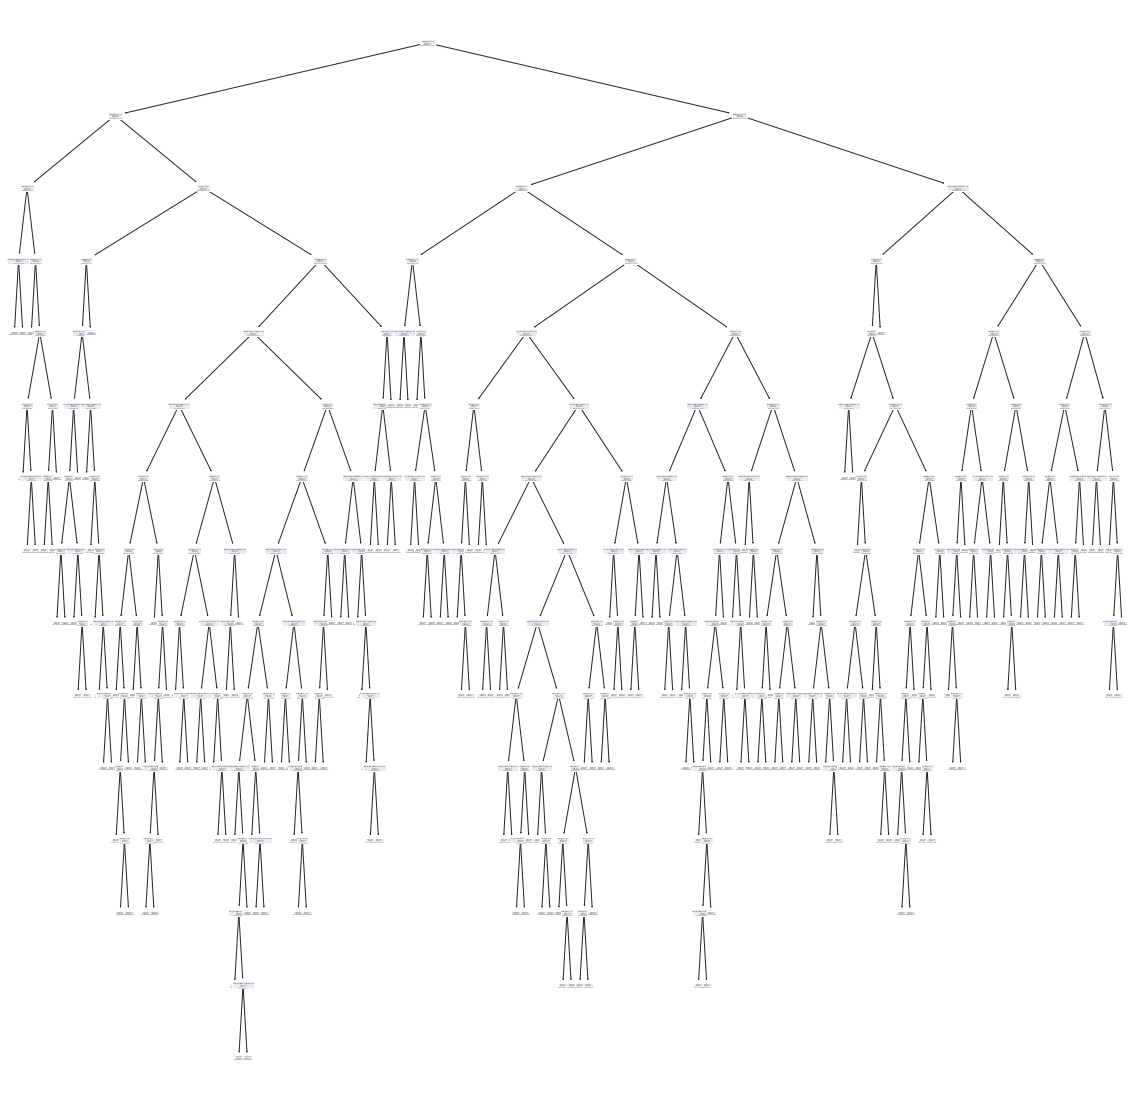

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (20,20))
a = tree.plot_tree(arvore_df_predicao, feature_names=descritivos_fatores)
fig.savefig('saida/01_arvore_df.png')

#### Árvore de decisão Randomica

In [148]:
random_forest_df = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
random_forest_df.fit(x_df_treinamento, y_df_treinamento.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [149]:
random_forest_df_previsores = random_forest_df.predict(x_df_teste)
random_forest_df_previsores

array([1, 1, 1, 5, 2, 1, 3, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1,
       0, 1, 0, 2, 0, 0, 3, 1, 0, 0, 2, 3, 0, 0, 4, 1, 1, 0, 2, 2, 3, 1,
       5, 0, 0, 3, 0, 2, 2, 2, 5, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2,
       2, 3, 2, 0, 2, 0, 3, 4, 1, 4, 1, 2, 1, 0, 4, 2, 2, 2, 0, 2, 3, 0,
       1, 2, 3, 4, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 5, 5, 0, 1, 1, 0, 1,
       0, 3, 0, 1, 0, 1, 0, 1, 3, 1, 1, 1, 5, 1, 0, 3, 5, 0, 1, 2, 2, 2,
       5, 2, 2, 3, 0, 0, 2, 2, 3, 2, 1, 1, 0, 2, 0, 2, 3, 0, 0, 1, 0, 2,
       0, 3, 0, 0, 1, 0, 3, 1, 4, 3, 5, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 5,
       2, 1, 1, 1, 5, 0, 4, 1, 2, 0, 0, 1, 0, 1, 4, 3, 4, 0, 3, 2, 2, 1,
       3, 1, 3, 2, 1, 0, 1, 5, 1, 0, 4, 2, 1, 3, 2, 0, 2, 0, 2, 3, 0, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 5, 5, 0, 3, 5, 0, 0, 0, 0, 0,
       0, 0, 2, 3, 4, 5, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0,
       0, 1, 2, 0, 1, 5, 2, 0, 5, 2, 1, 5, 2, 0, 0, 3, 0, 2, 2, 2, 0, 1,
       2, 5, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0,

In [150]:
accuracy_score(y_df_teste, random_forest_df_previsores)

0.8279742765273312

0.8279742765273312

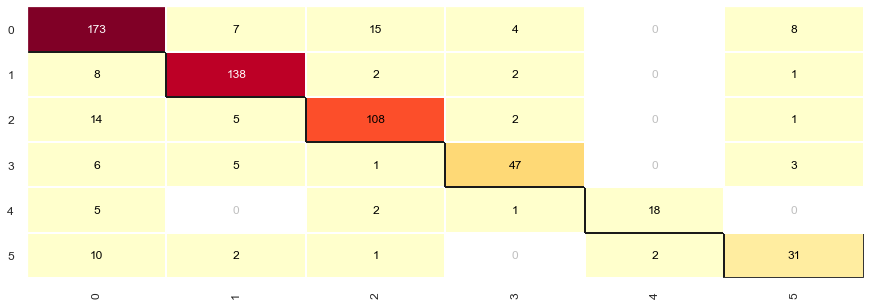

In [151]:
cm = ConfusionMatrix(random_forest_df)
cm.fit(x_df_treinamento, y_df_treinamento)
cm.score(x_df_teste, y_df_teste)

In [152]:
print(classification_report(y_df_teste, random_forest_df_previsores))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       207
           1       0.88      0.91      0.90       151
           2       0.84      0.83      0.83       130
           3       0.84      0.76      0.80        62
           4       0.90      0.69      0.78        26
           5       0.70      0.67      0.69        46

    accuracy                           0.83       622
   macro avg       0.83      0.78      0.80       622
weighted avg       0.83      0.83      0.83       622



#### KNN

In [153]:
knn_df = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1)

In [154]:
knn_df.fit(x_df_treinamento, y_df_treinamento.ravel())

KNeighborsClassifier(n_neighbors=1, p=1)

In [155]:
knn_df_previsores = knn_df.predict(x_df_teste)

In [156]:
accuracy_score(y_df_teste, knn_df_previsores)

0.8263665594855305

0.8263665594855305

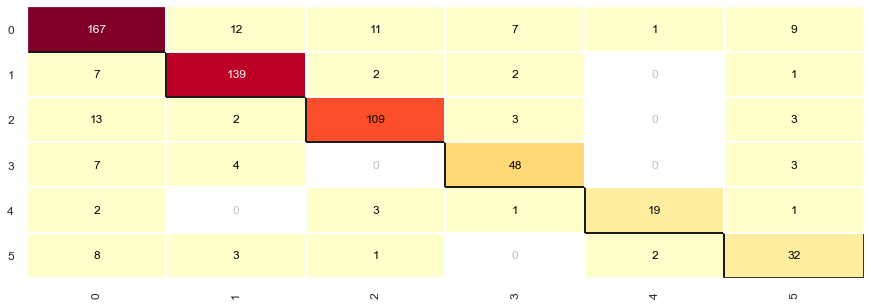

In [157]:
cm = ConfusionMatrix(knn_df)
cm.fit(x_df_treinamento, y_df_treinamento)
cm.score(x_df_teste, y_df_teste)

In [158]:
print(classification_report(y_df_teste, random_forest_df_previsores))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       207
           1       0.88      0.91      0.90       151
           2       0.84      0.83      0.83       130
           3       0.84      0.76      0.80        62
           4       0.90      0.69      0.78        26
           5       0.70      0.67      0.69        46

    accuracy                           0.83       622
   macro avg       0.83      0.78      0.80       622
weighted avg       0.83      0.83      0.83       622

